# ADS Homework 3

## 1: Classification of Hand-Written Digits

Sklearn provides a dataset of handwritten digits as one of the examples. This data includes impages of 1787 digits. For each digit, we have 64 variables x1,x2,...x64, each one representing a pixel (grayscale from 0 to 16) on the 8x8 image. The label (y) for each image is the actual digit it represents from 0 to 9.  

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import t

In [84]:
#Load the data
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
#Make a dataframe
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.iloc[:,1:]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [85]:
#original image data is a 2D array
X.shape

(1797, 64)

#### If we take the first 10 observations and reconstruct the graph and we could see:  

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


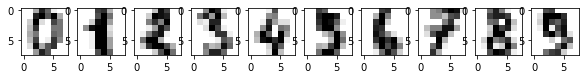

In [86]:
#plot the digits using imshow from matplotlib
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

### Task 1: Apply PCA to see if we can describe the data with a smaller number of most significant features

In [87]:
from sklearn.decomposition import PCA

## code here
pca = PCA(data.iloc[:,1:].shape[1])
dataP=pca.fit_transform(data.iloc[:,1:])


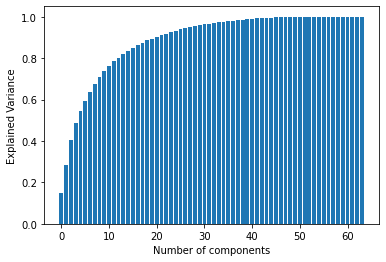

In [88]:
#Plot explained variance per number of leading PC's 

eigenvalues = pca.explained_variance_ratio_
eigenvalues
#plot explained variance over the number of compinents
n=64
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

The above plot shows that approx. 80% of the variance of the data is being explained with 20% of the components (~12 components) (thus making it very easy to reduce large amounts of complexity without giving up too much efficacy).

### Task 2: Now use three leading PCs to visualize the digits (different colors for different digits)

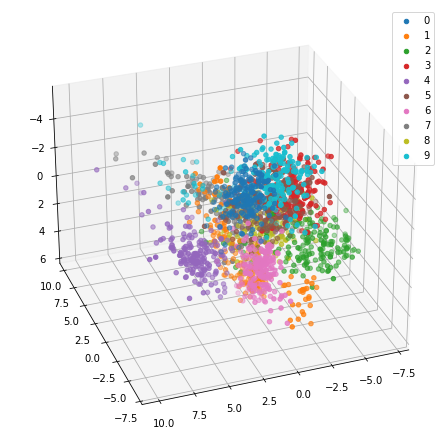

In [89]:
# use matplotlib 3D scatter plot: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

from sklearn import preprocessing

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
cmap=plt.cm.nipy_spectral(np.linspace(0, 1, 10))

## code here

scaler = preprocessing.StandardScaler().fit(data.iloc[:,1:])
pca = PCA(3)
dataP=pca.fit_transform(scaler.transform(data.iloc[:,1:]))

for d in range(0,10):
#     plt.plot(np.array(dataP[data.iloc[:,0]==d,0]), np.array(dataP[data.iloc[:,0]==d,1]),
#         'o', color=colors[d], alpha=0.8, label=d)
    ax.scatter(np.array(dataP[data.iloc[:,0]==d,0]), np.array(dataP[data.iloc[:,0]==d,1]), zs=np.array(dataP[data.iloc[:,0]==d,2]), zdir='z', label=d)

plt.legend([0,1,2,3,4,5,6,7,8,9],loc='upper right');


### Task 3: Find six examples of the pairs of digits which a) can and b) can not be clearly distinguished on a 2D plot of  first two PCs (3 examples each)

<ipython-input-90-5cd8a66164e6>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


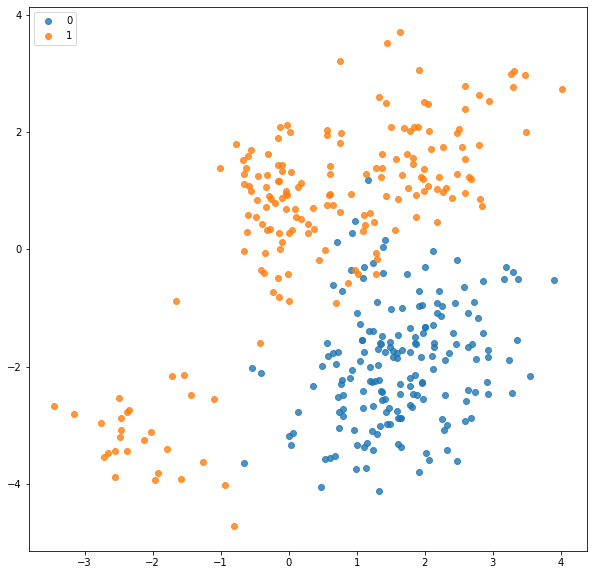

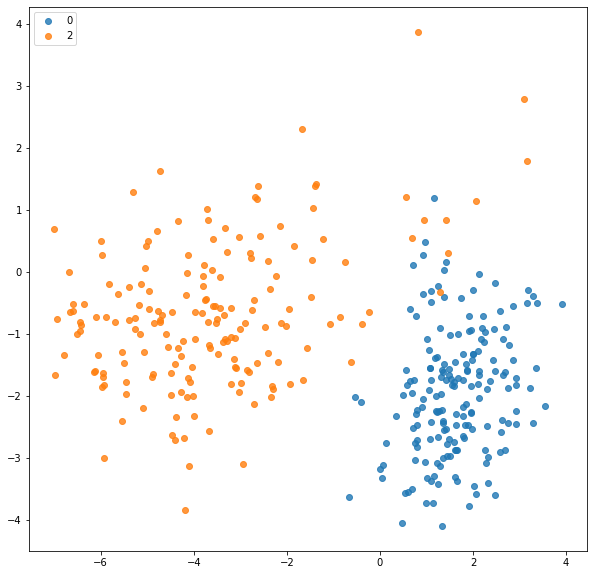

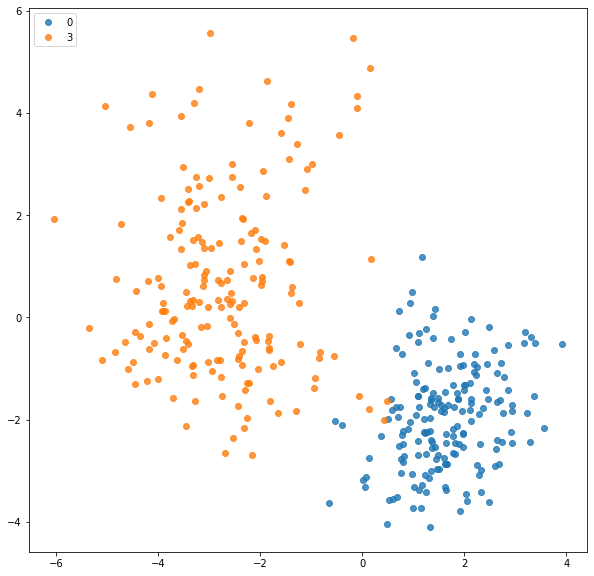

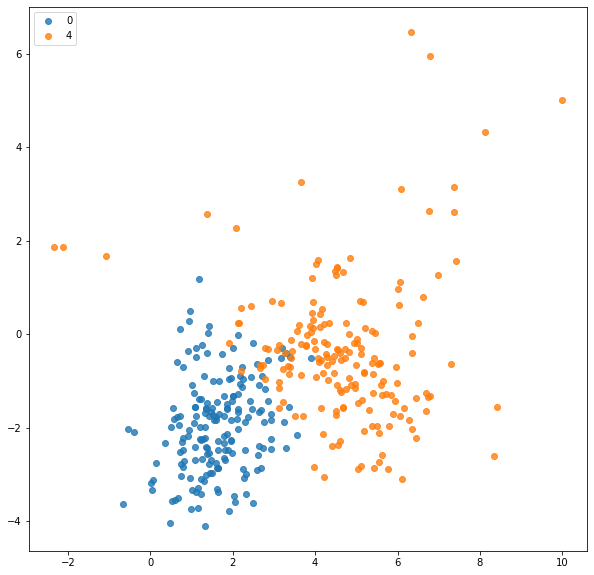

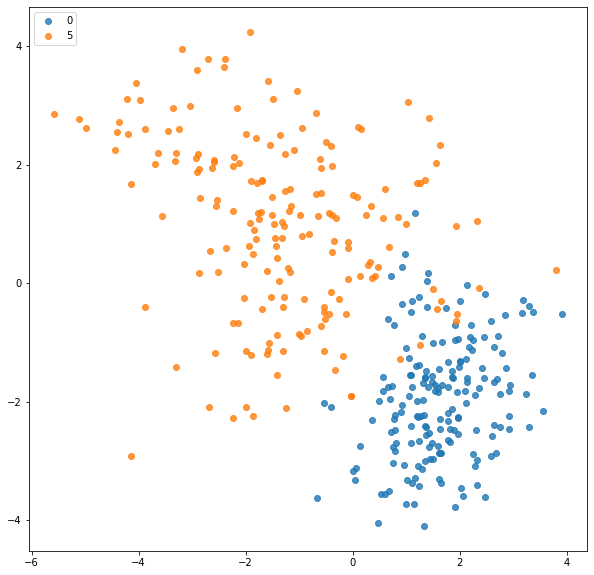

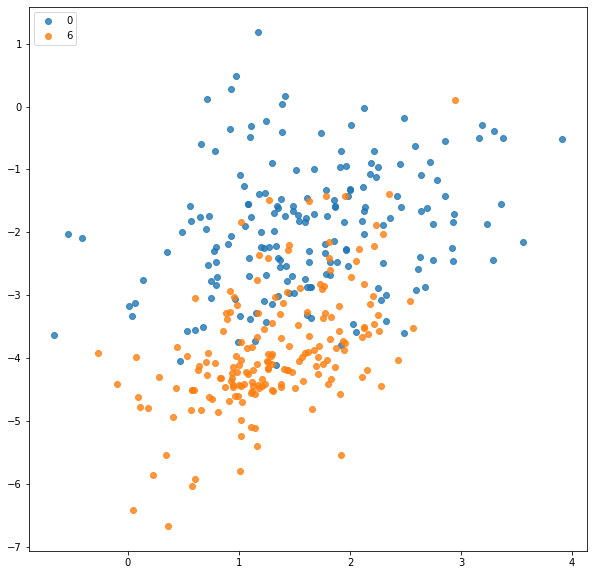

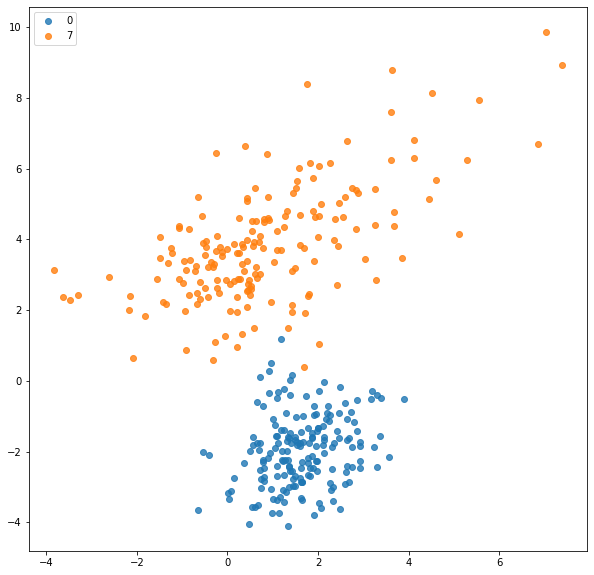

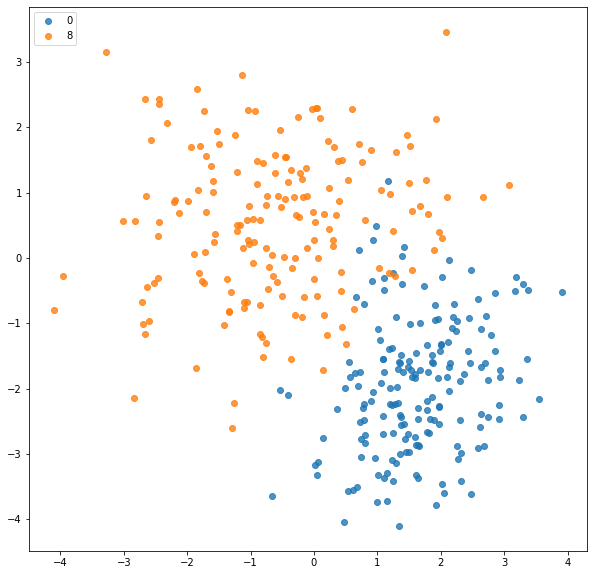

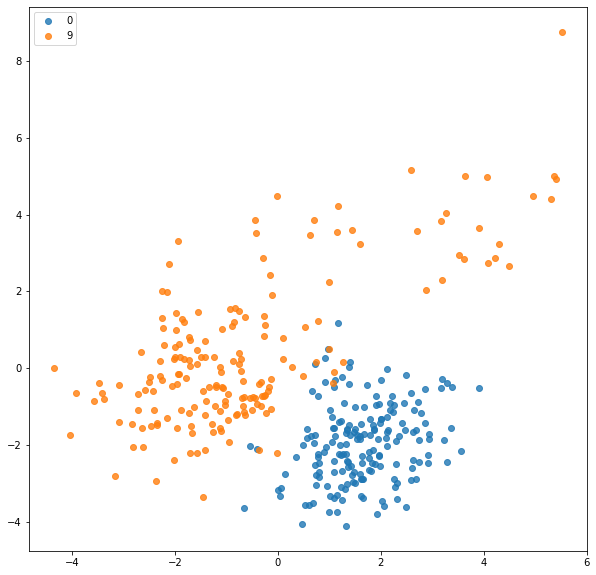

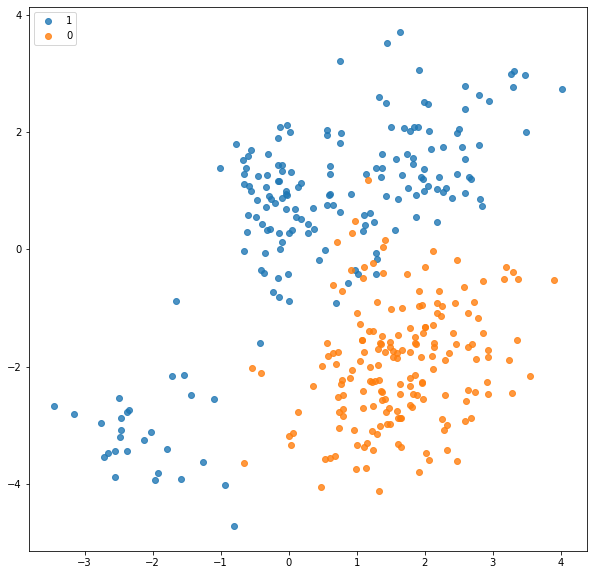

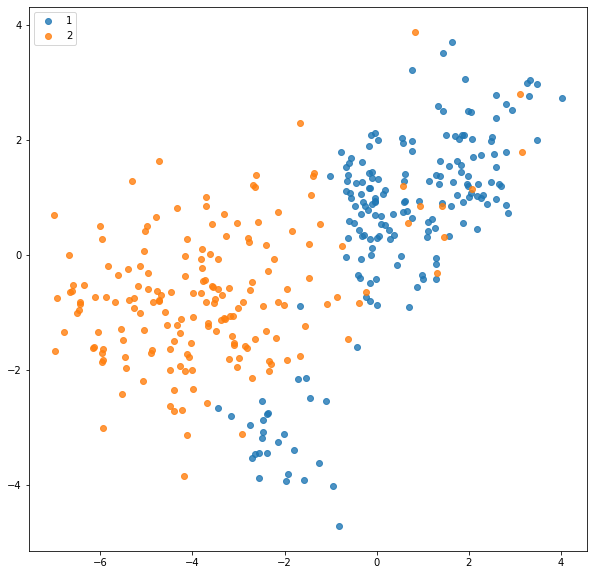

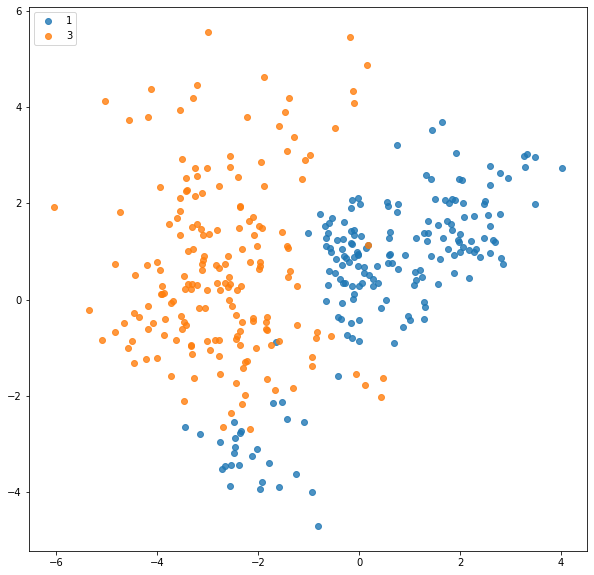

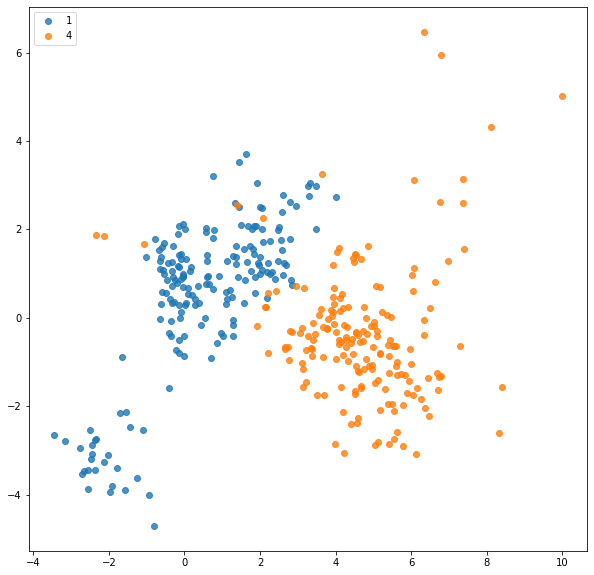

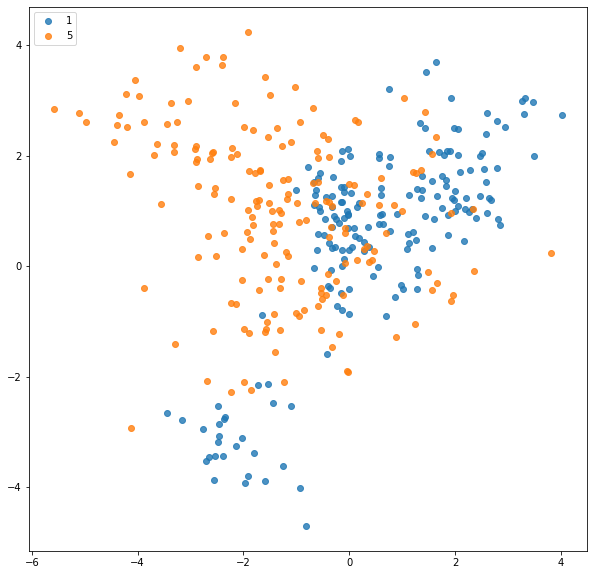

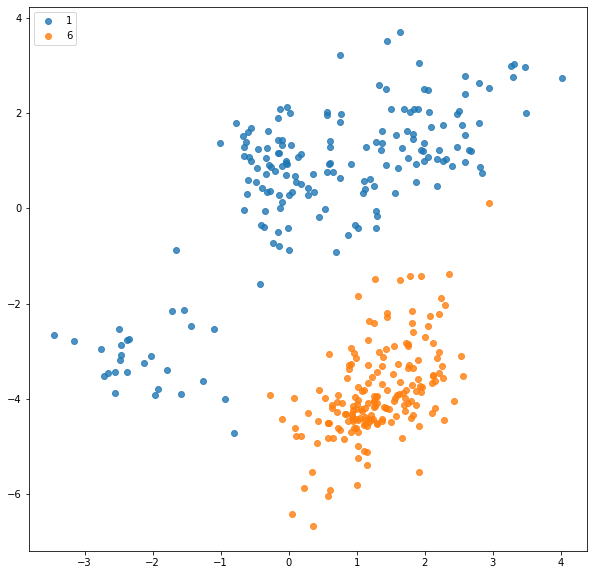

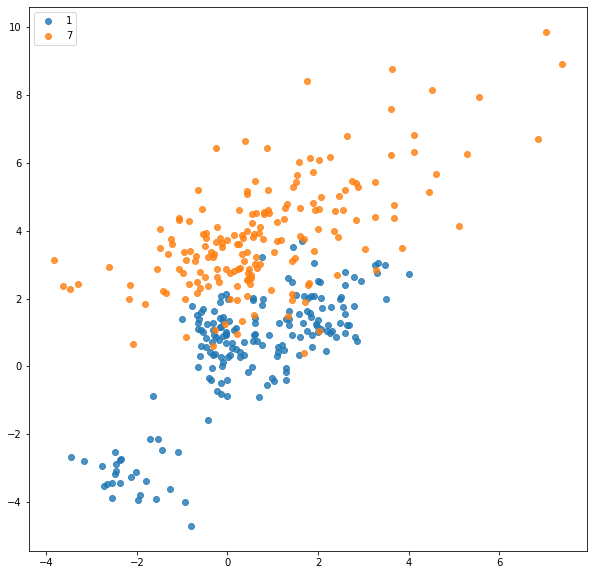

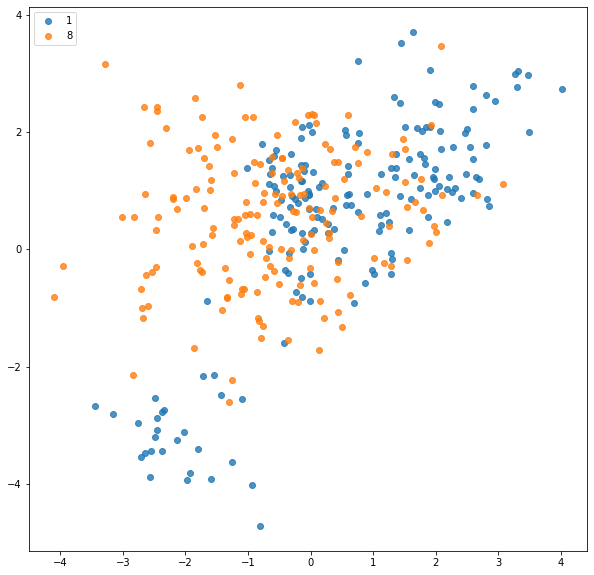

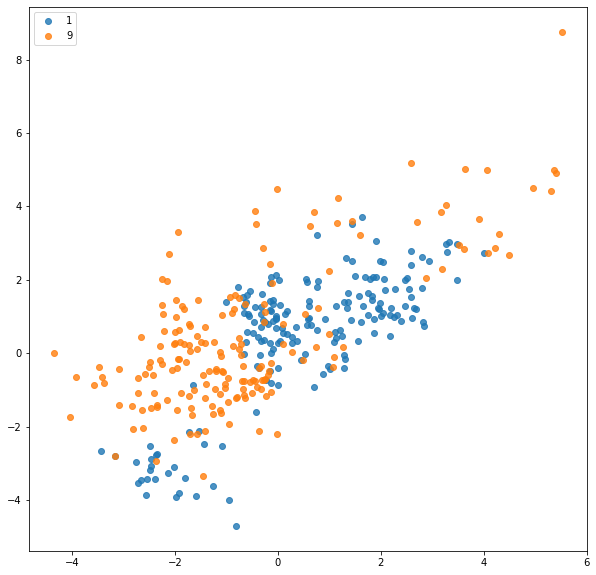

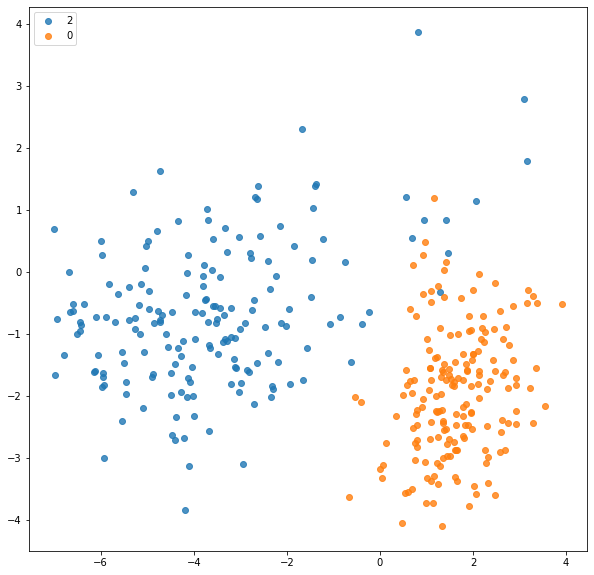

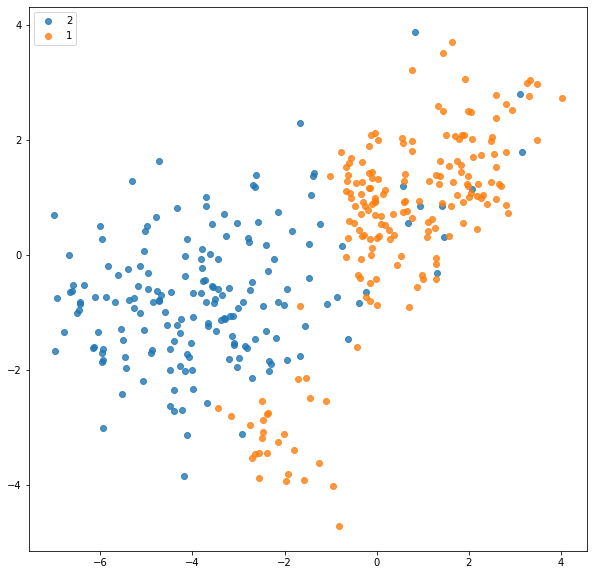

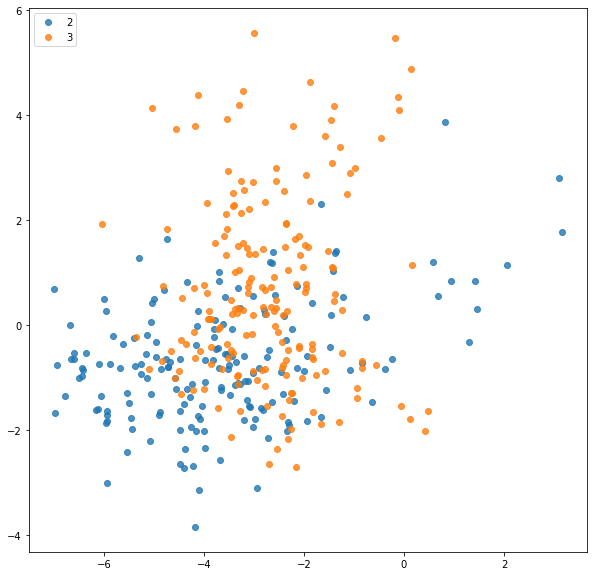

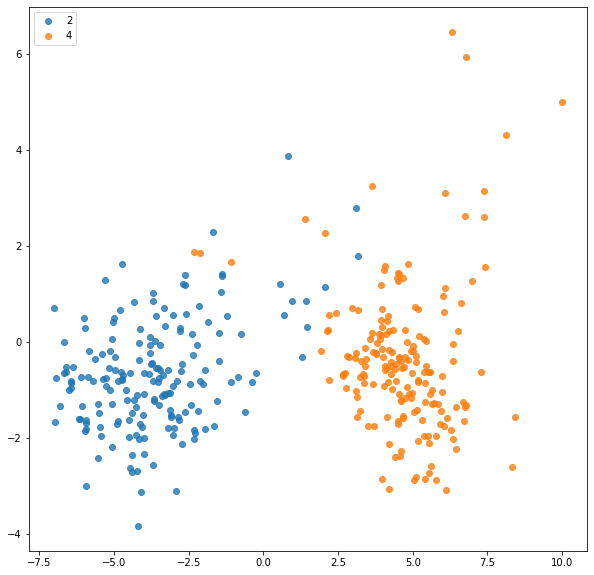

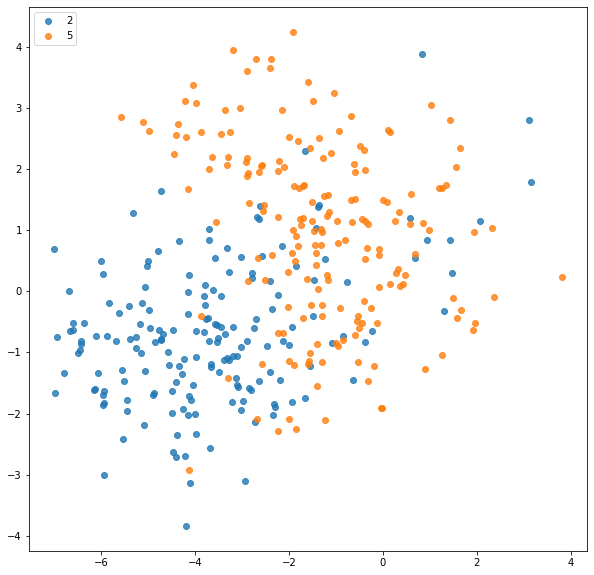

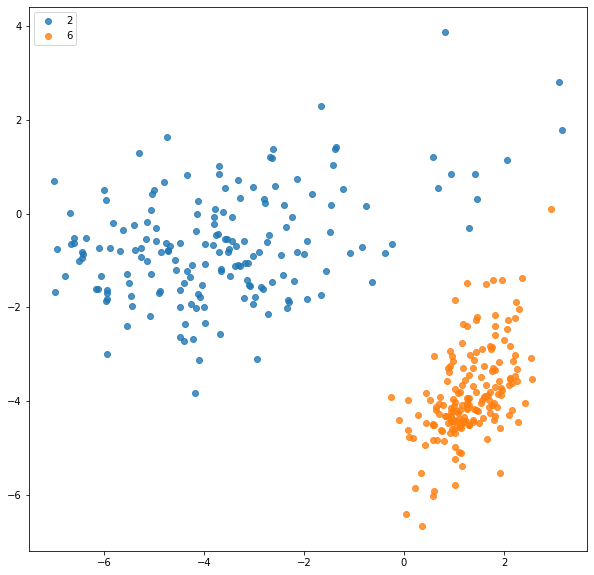

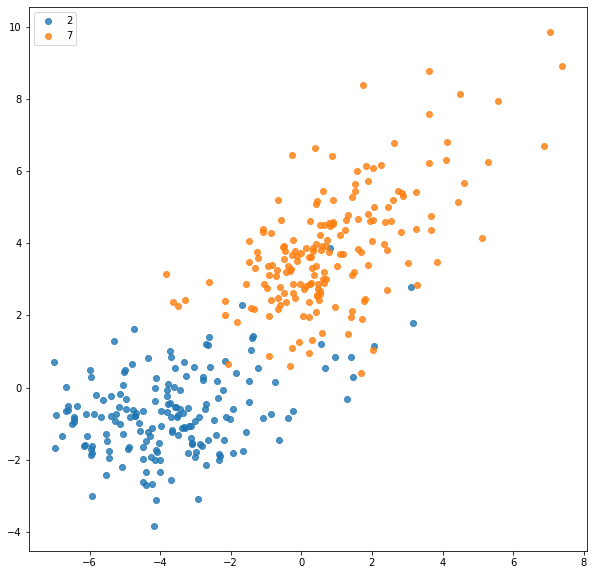

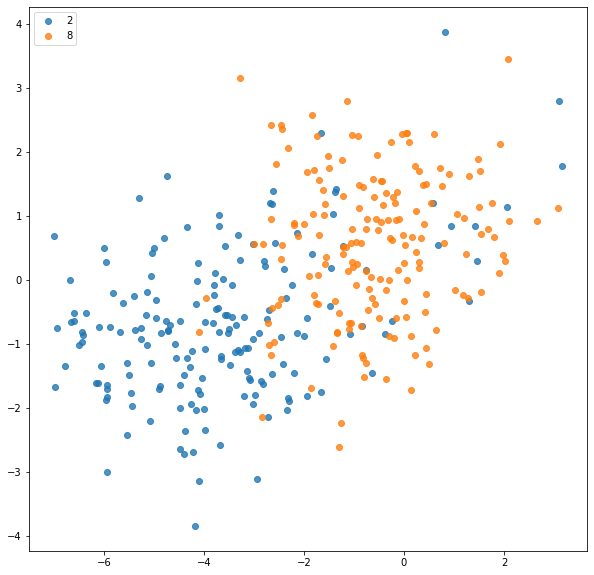

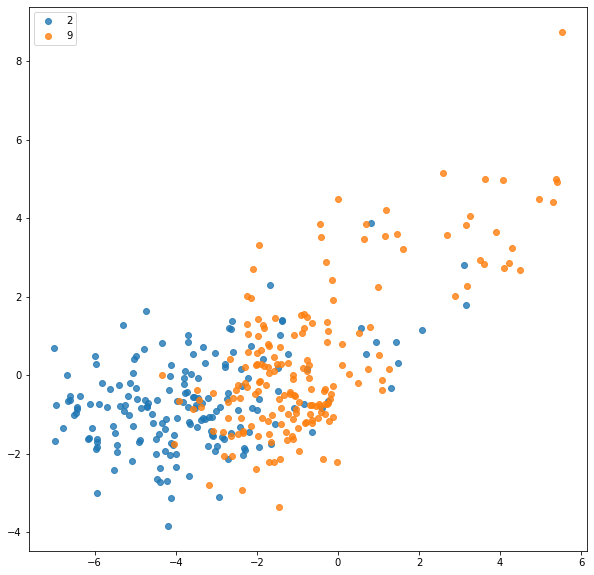

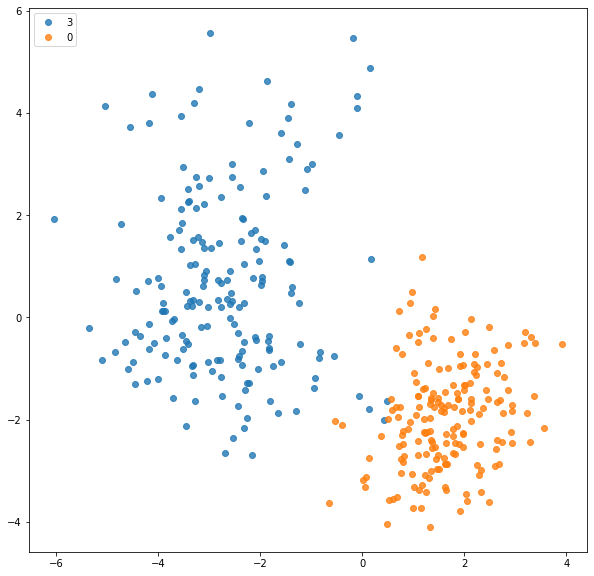

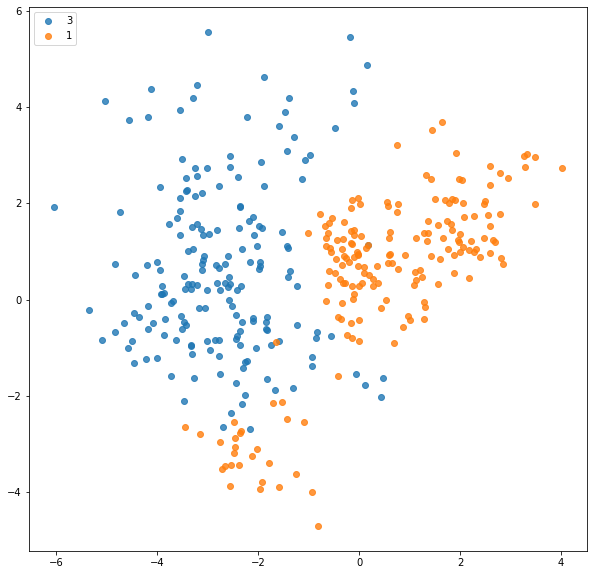

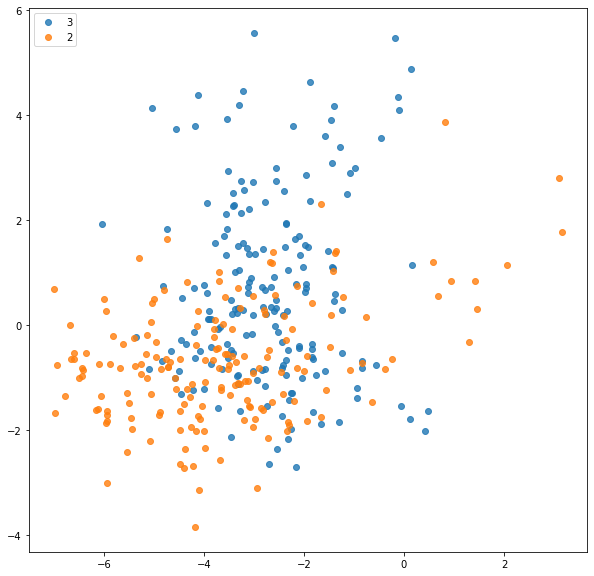

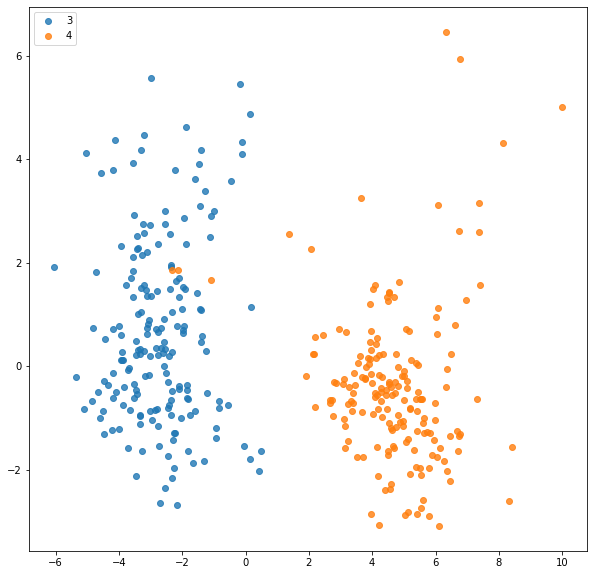

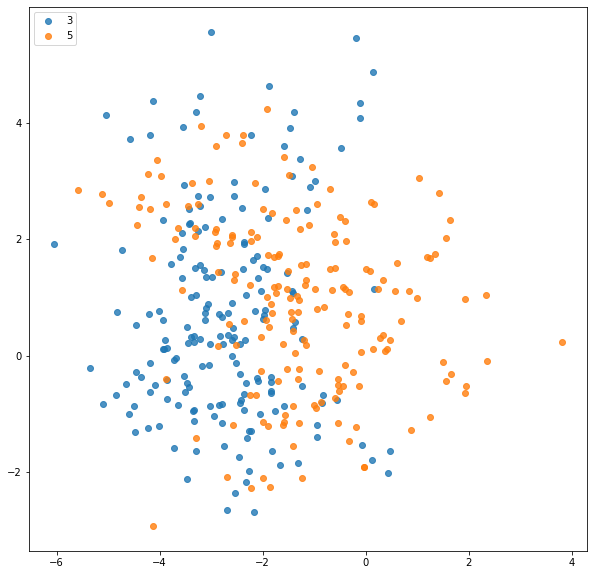

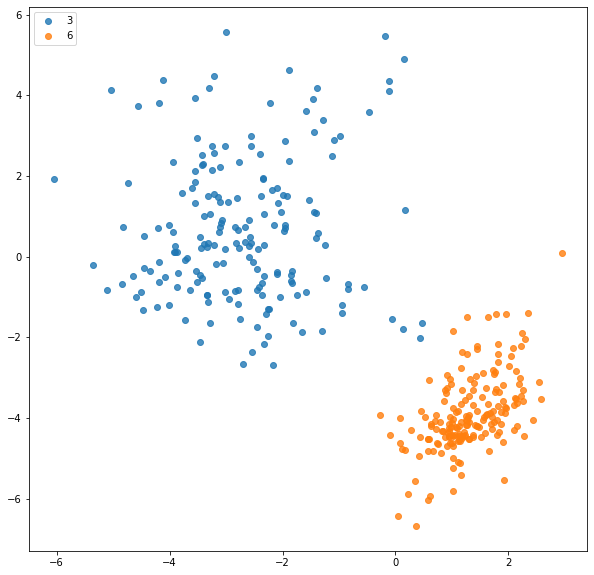

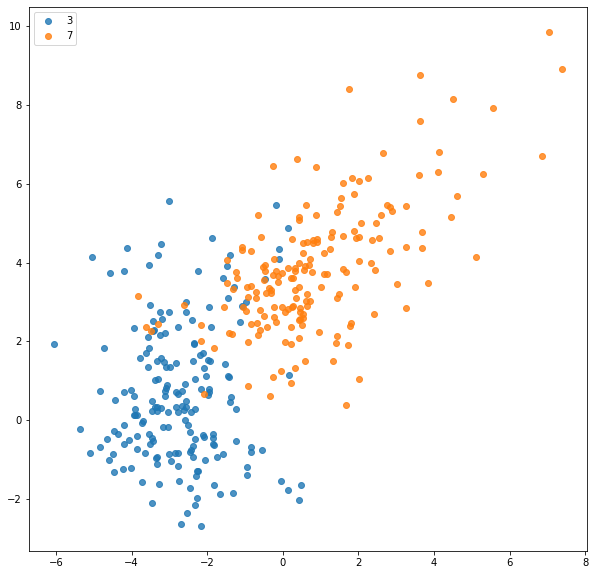

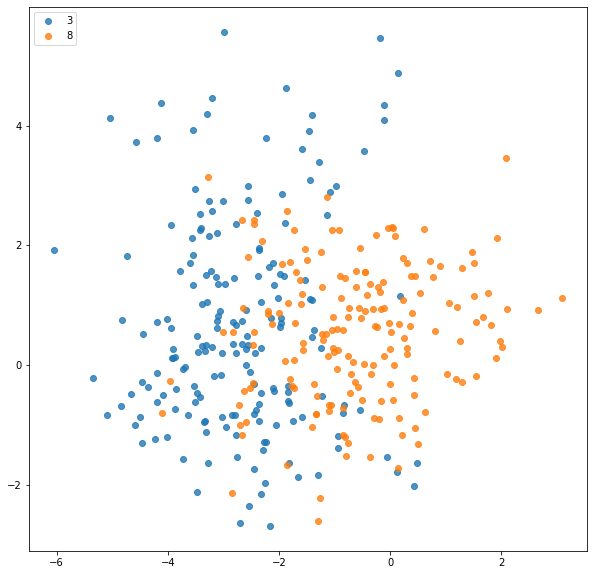

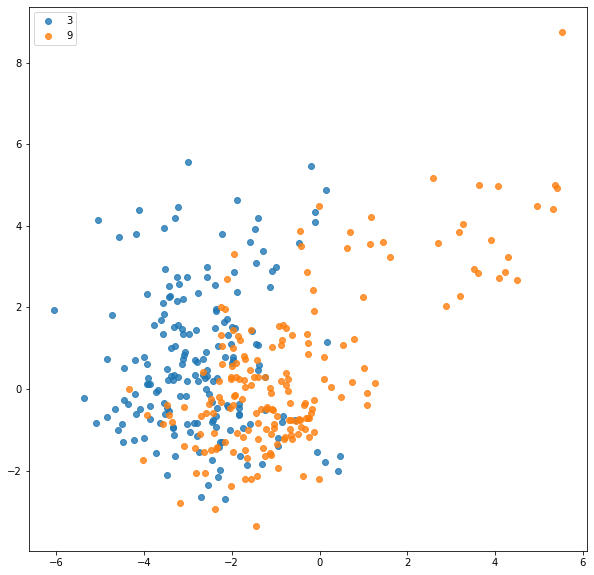

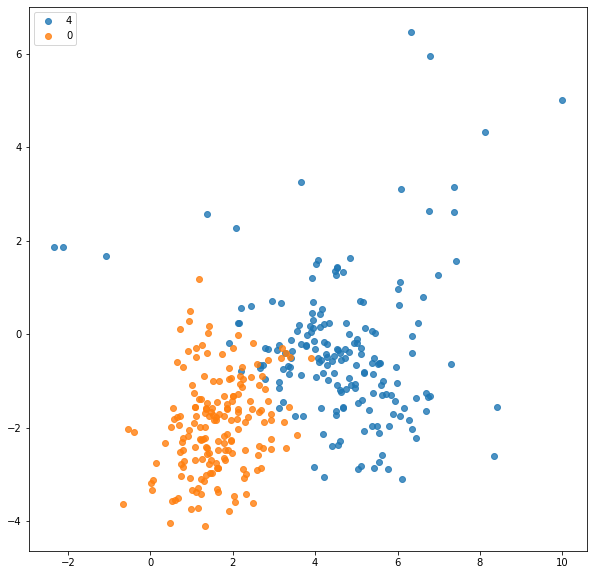

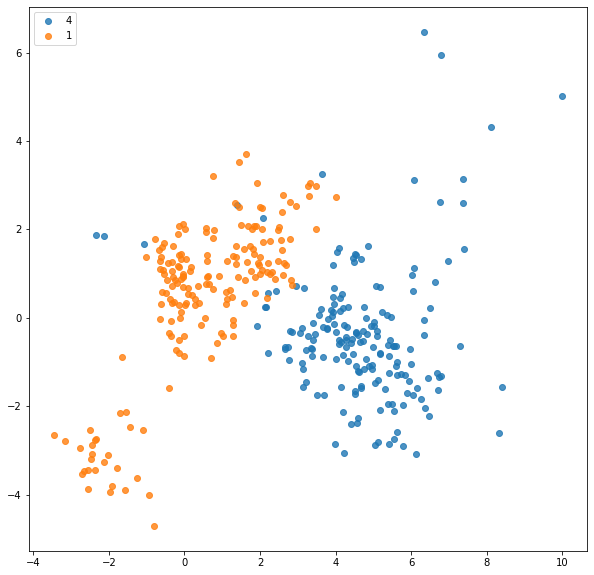

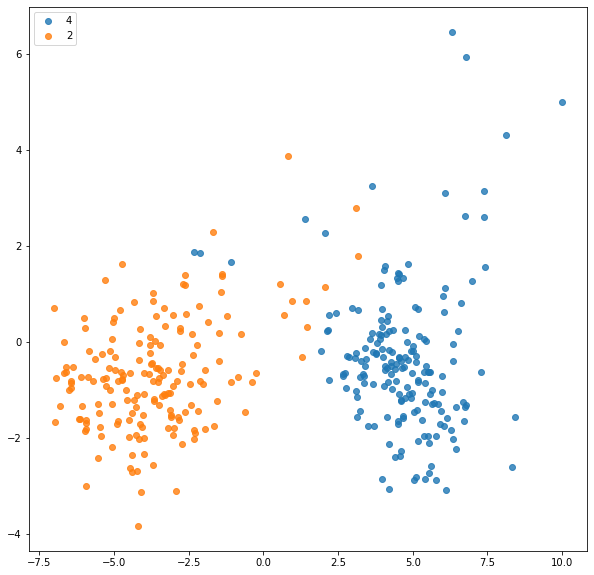

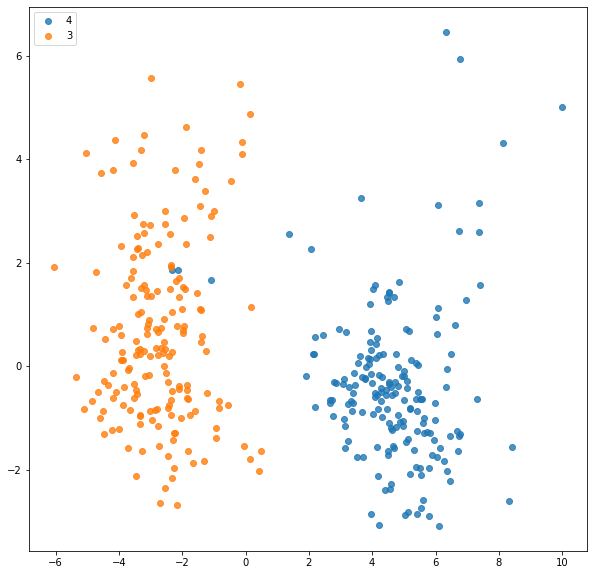

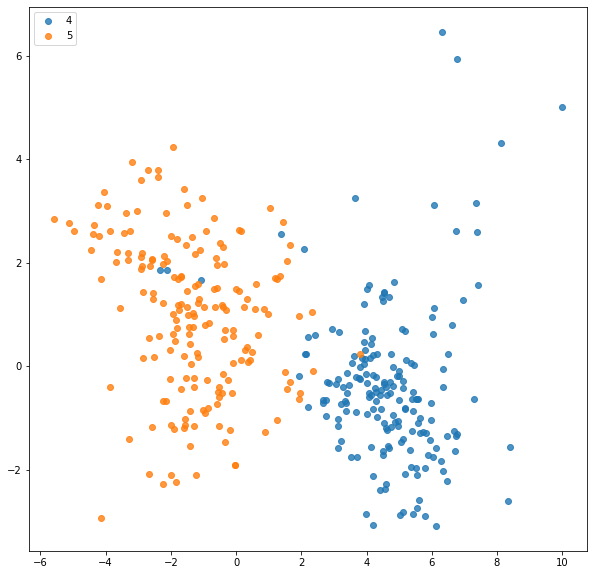

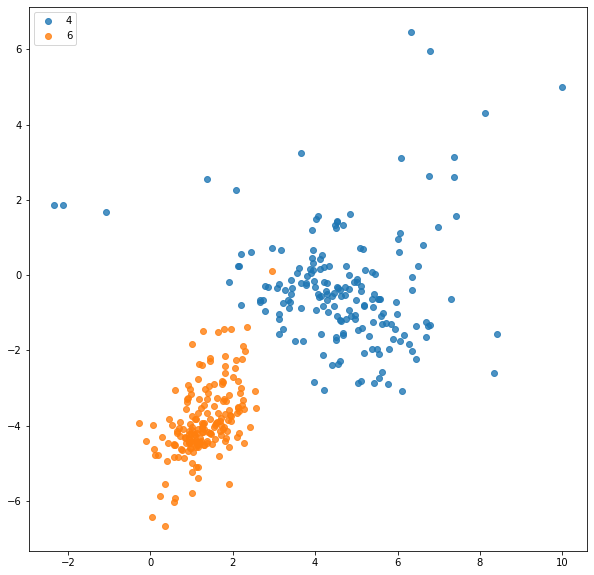

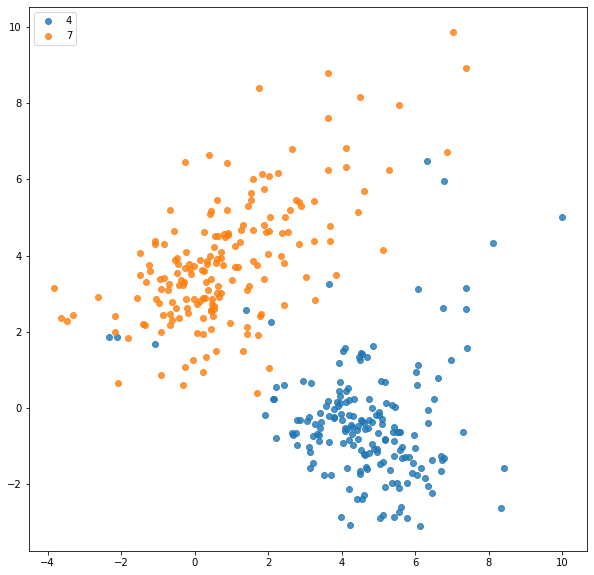

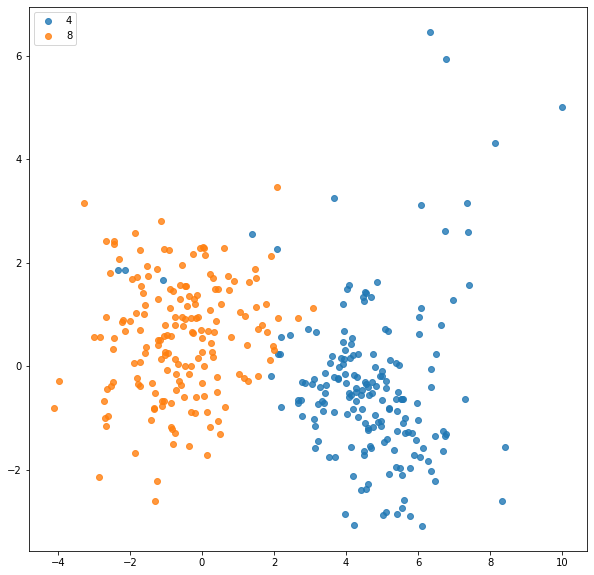

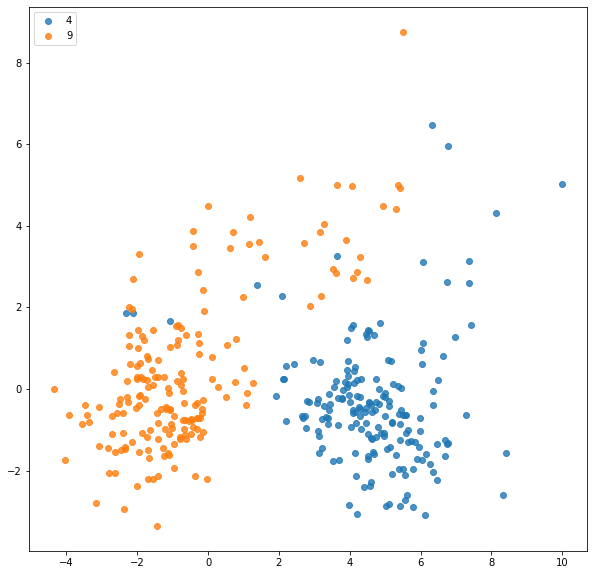

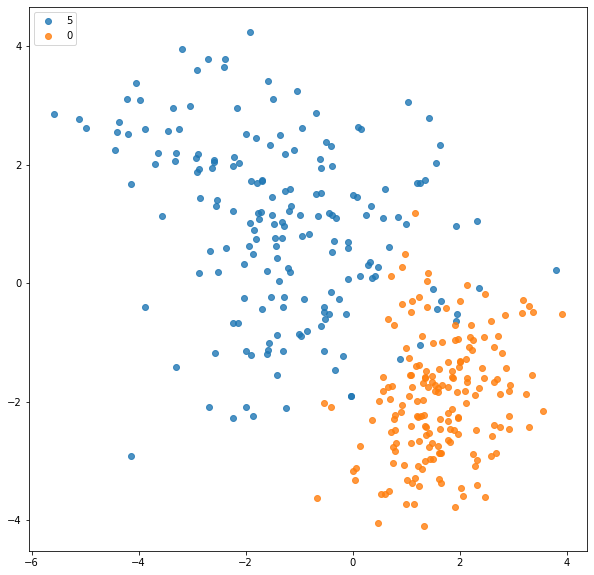

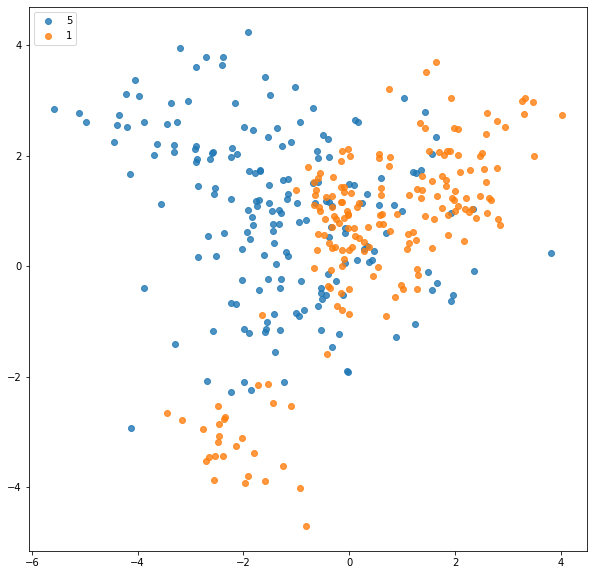

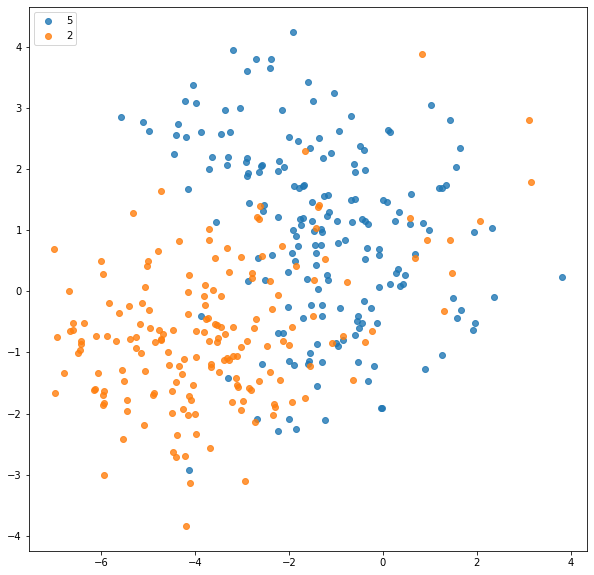

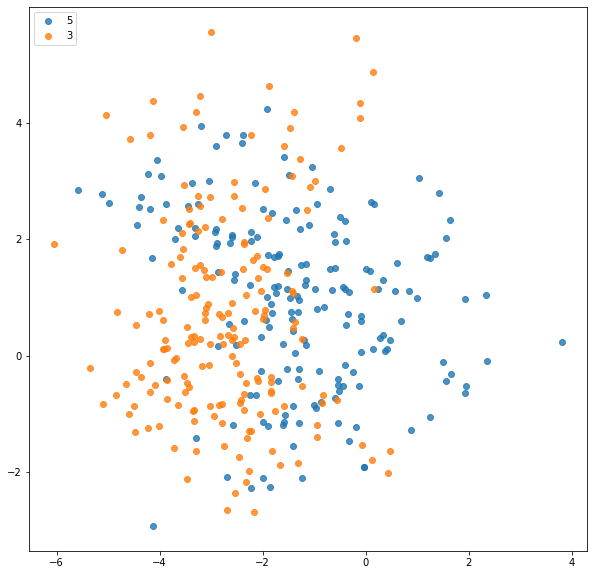

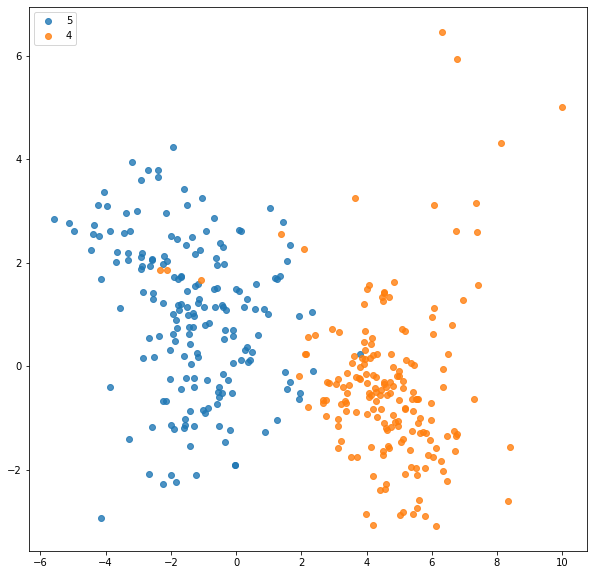

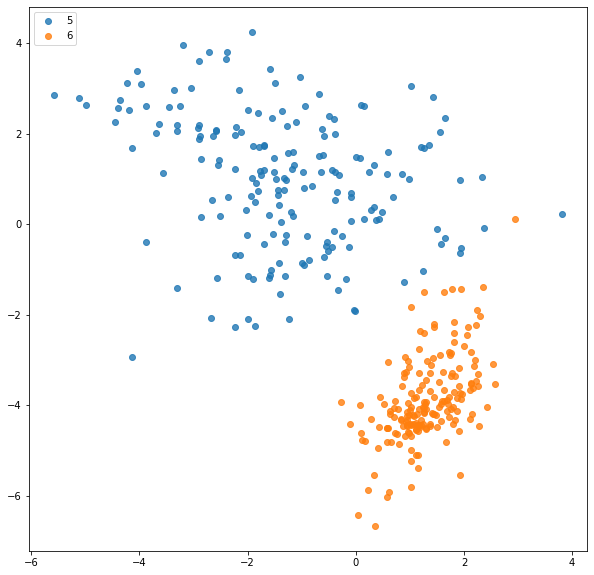

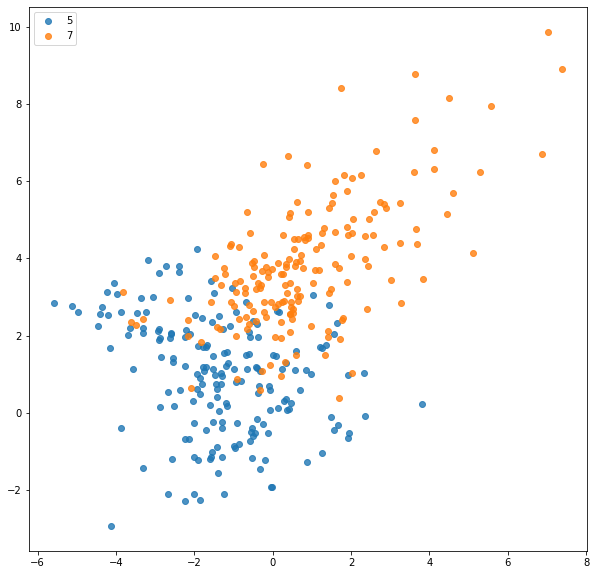

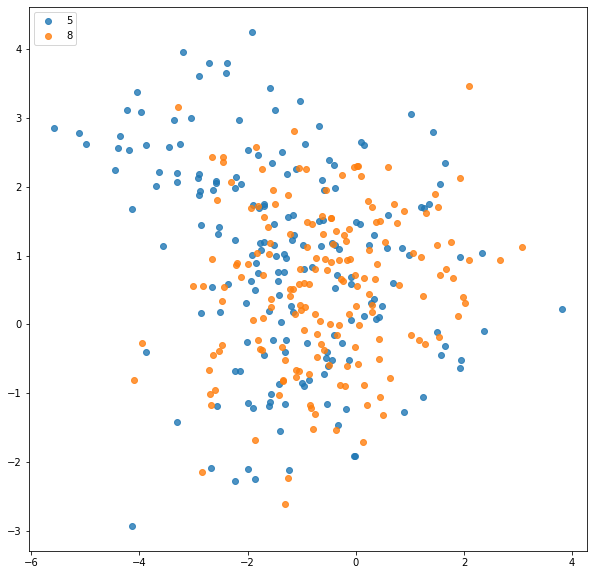

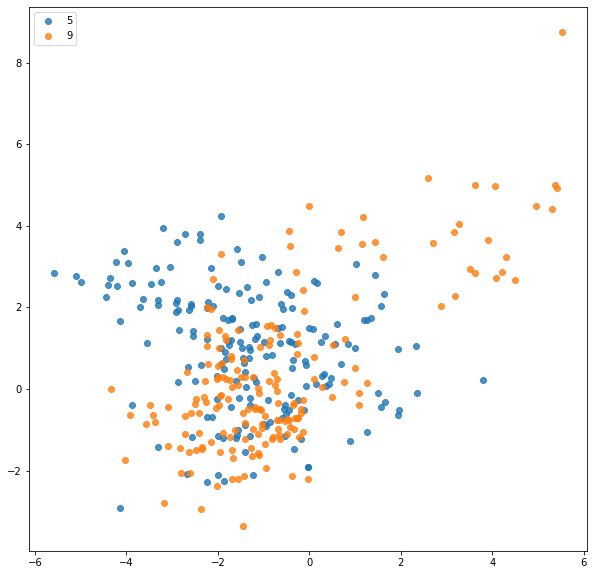

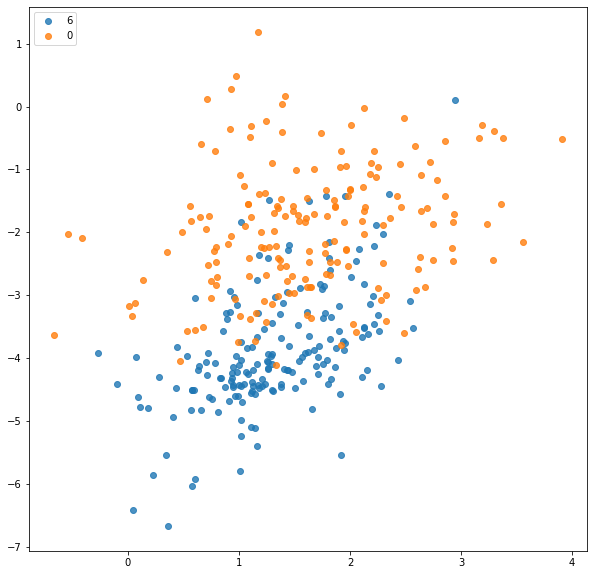

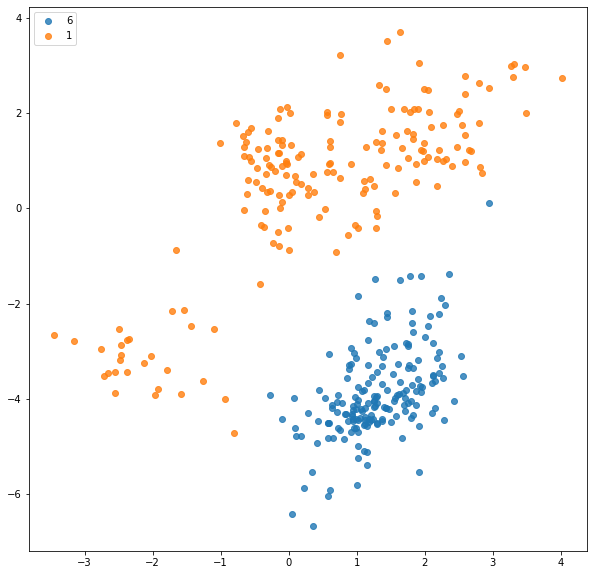

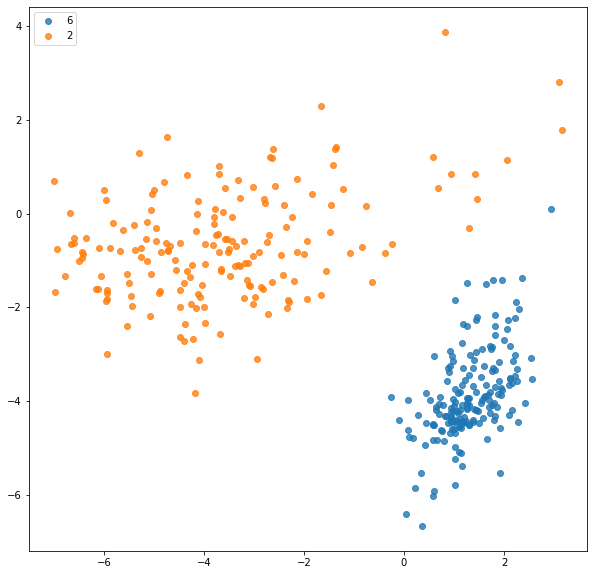

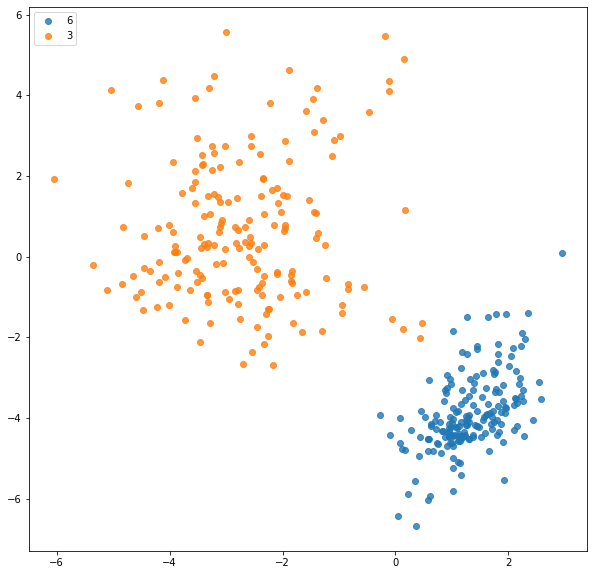

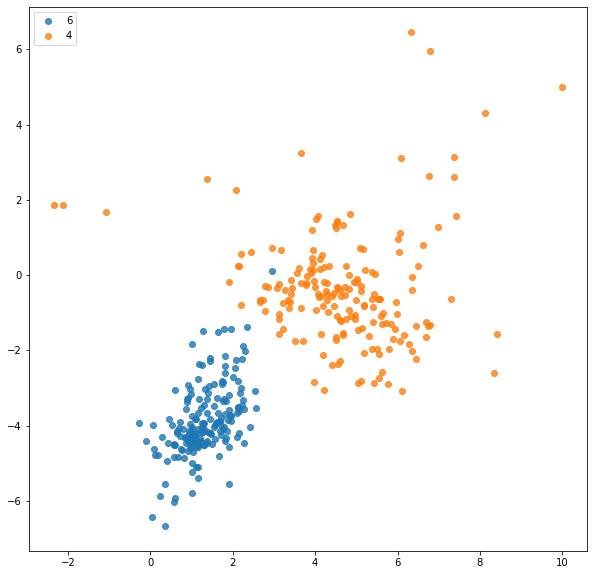

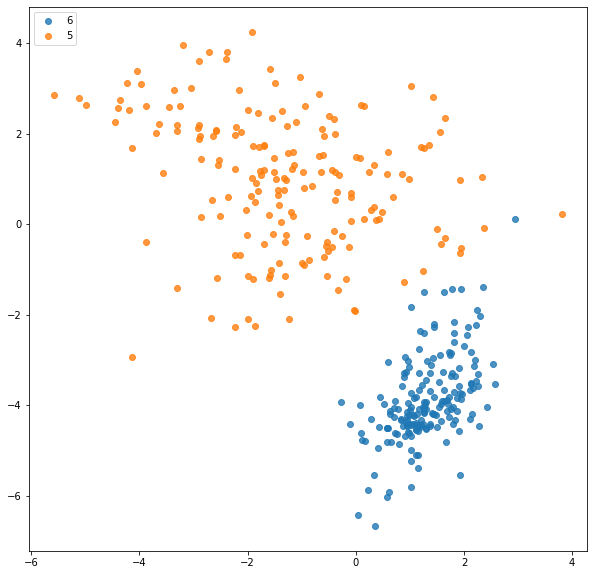

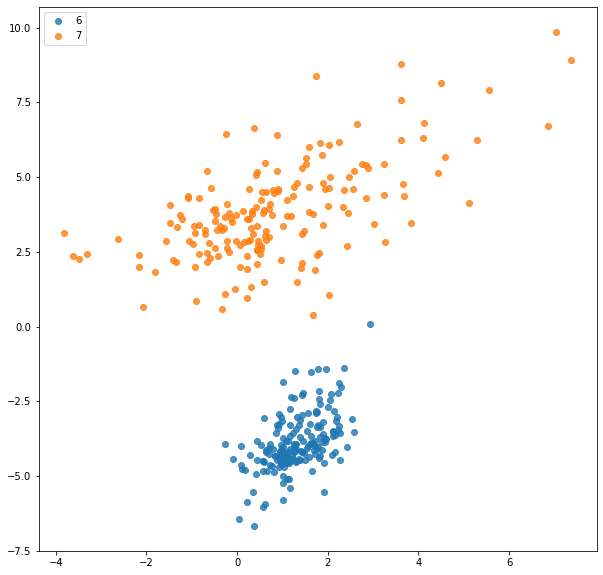

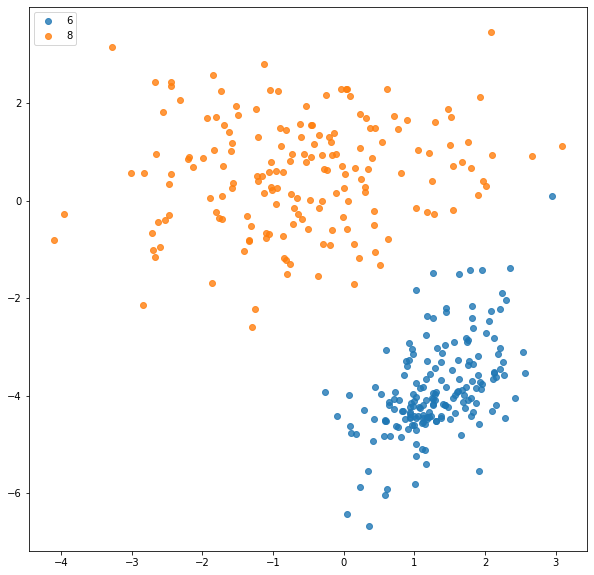

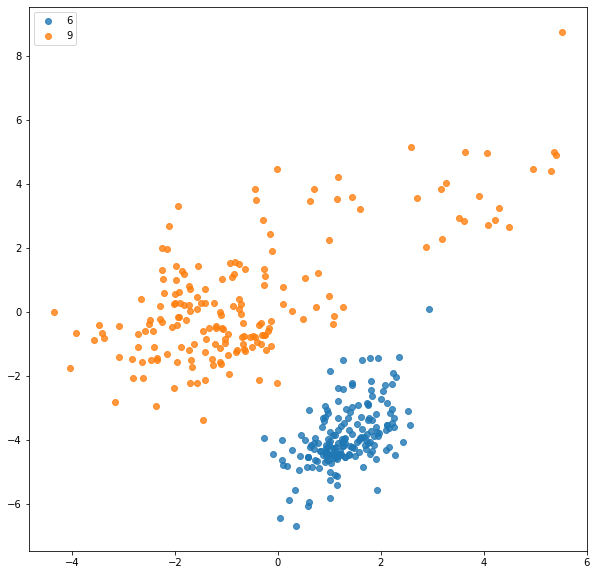

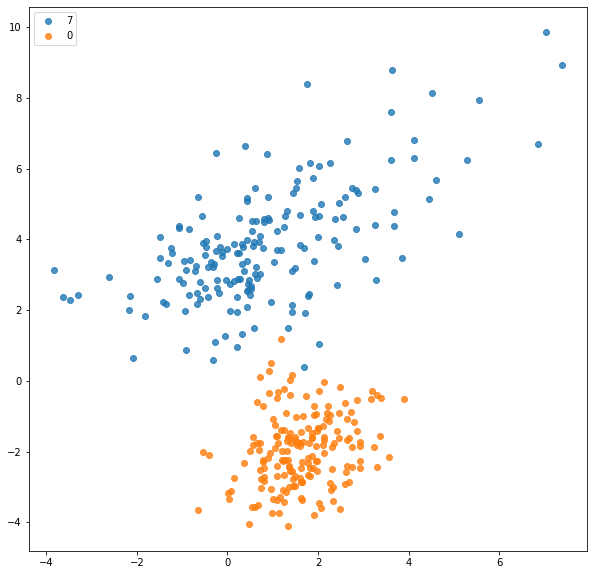

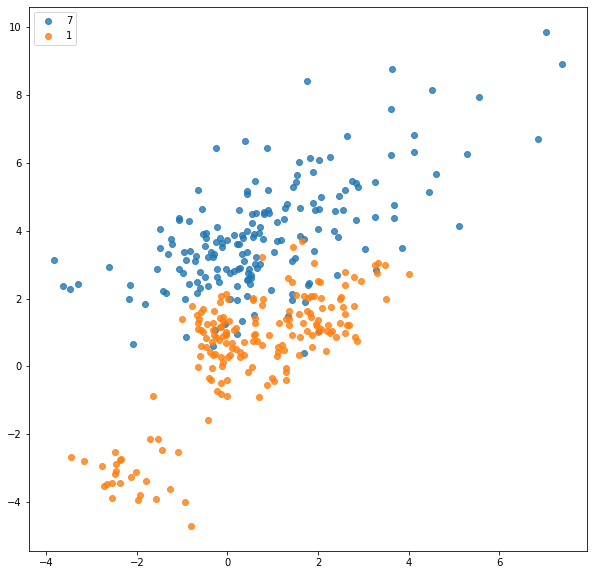

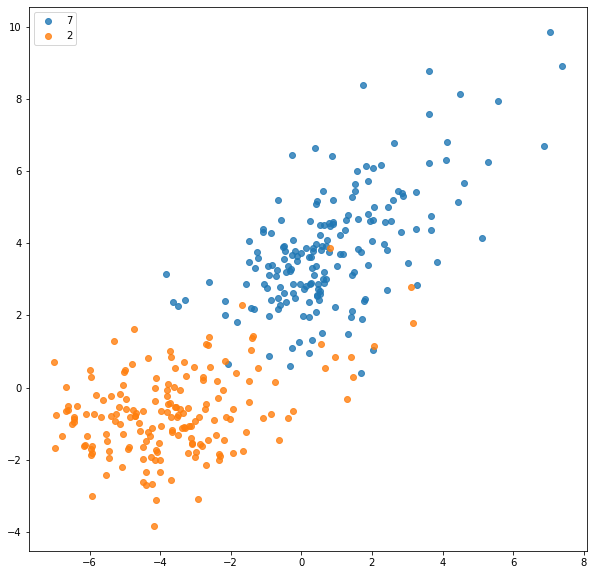

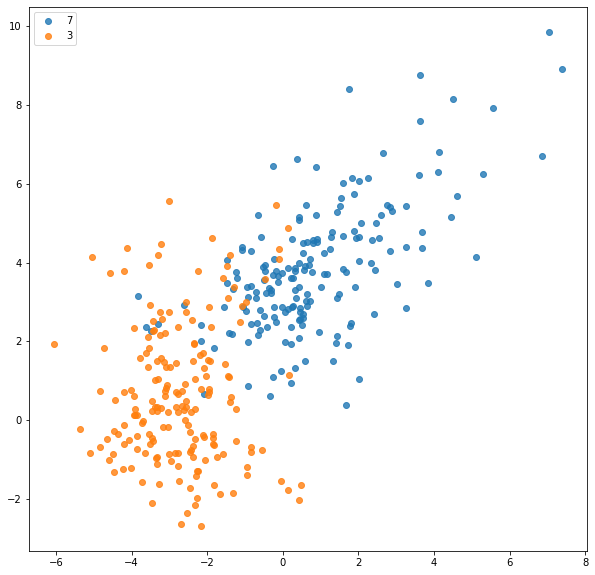

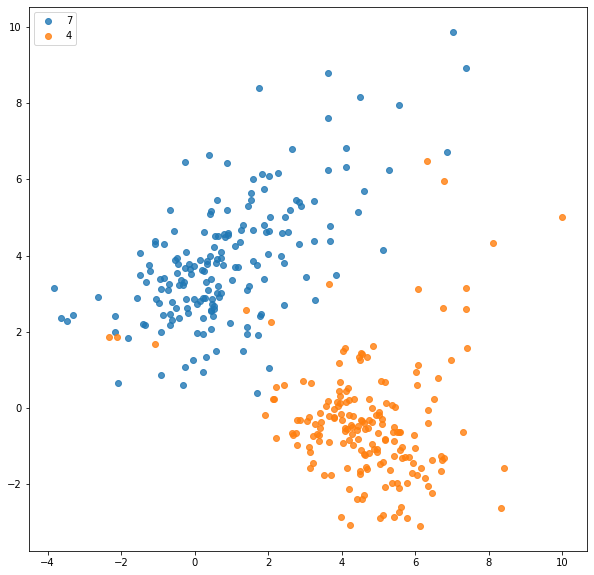

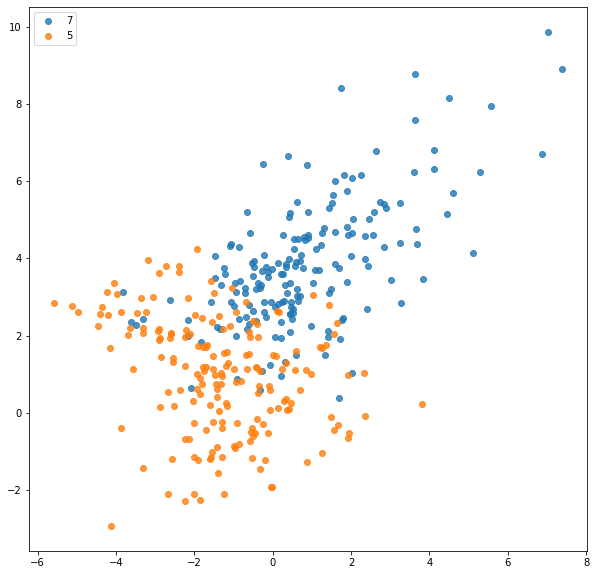

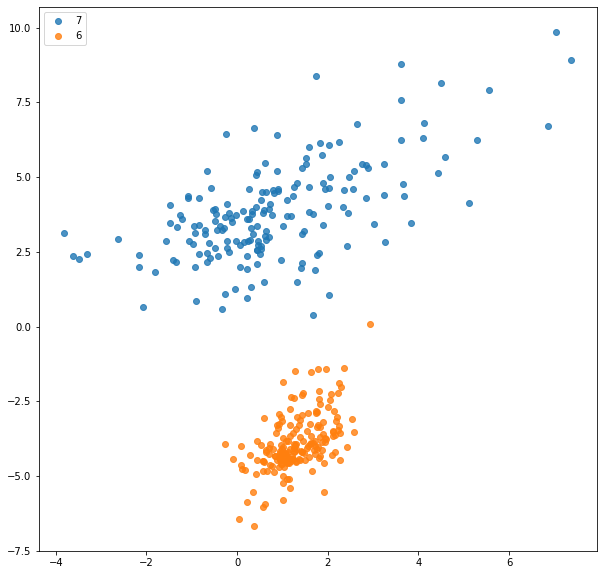

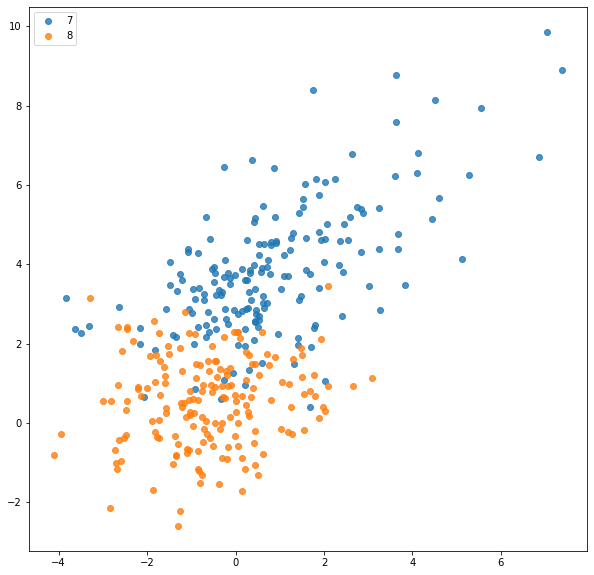

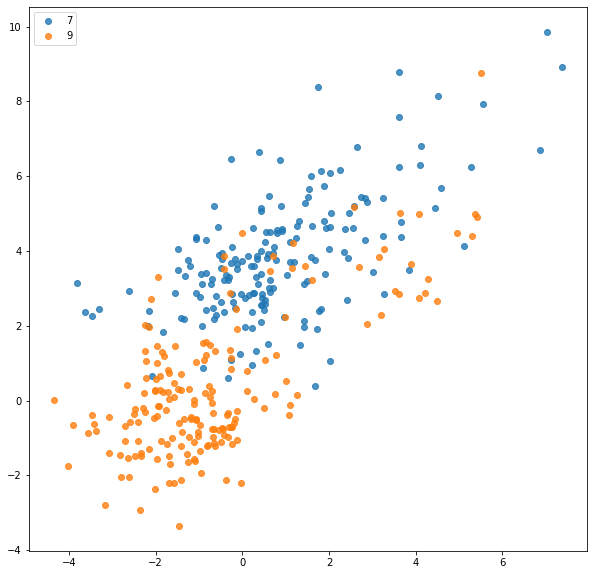

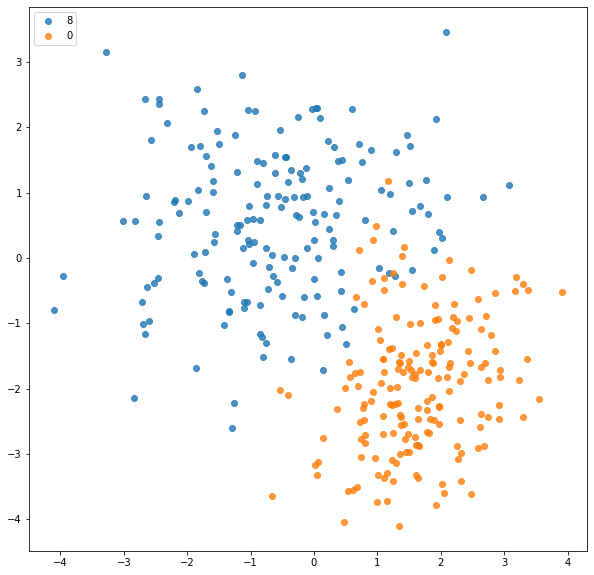

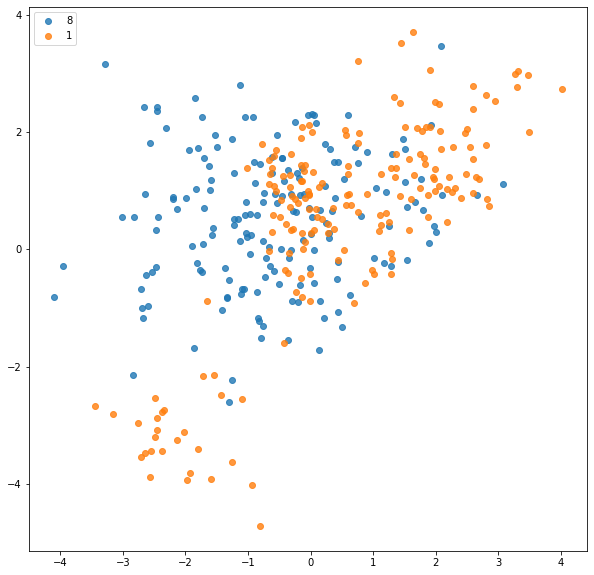

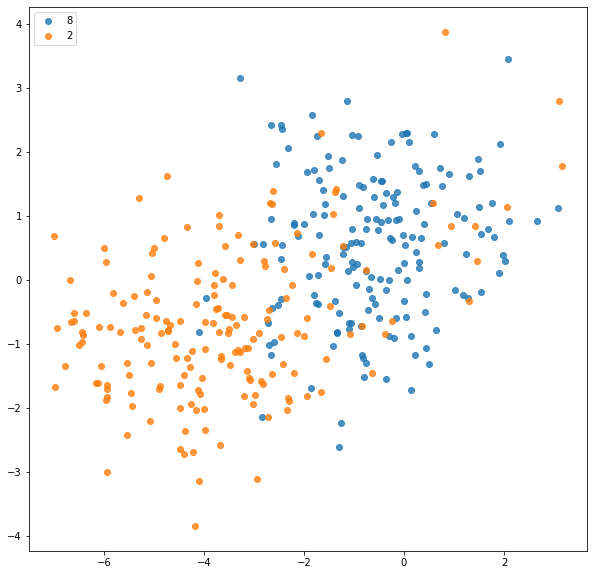

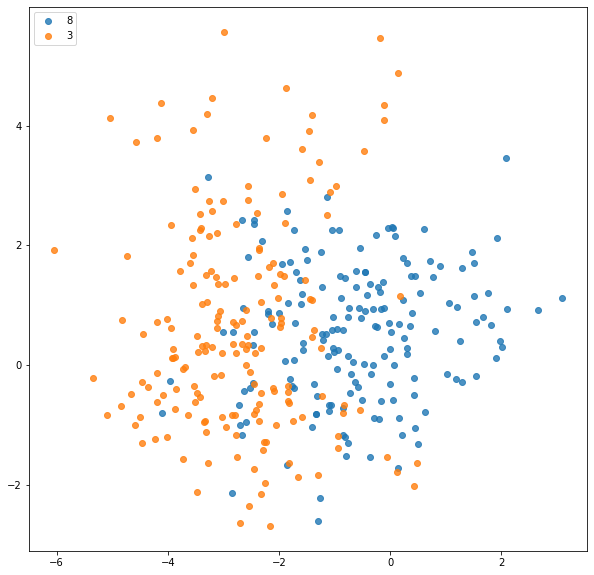

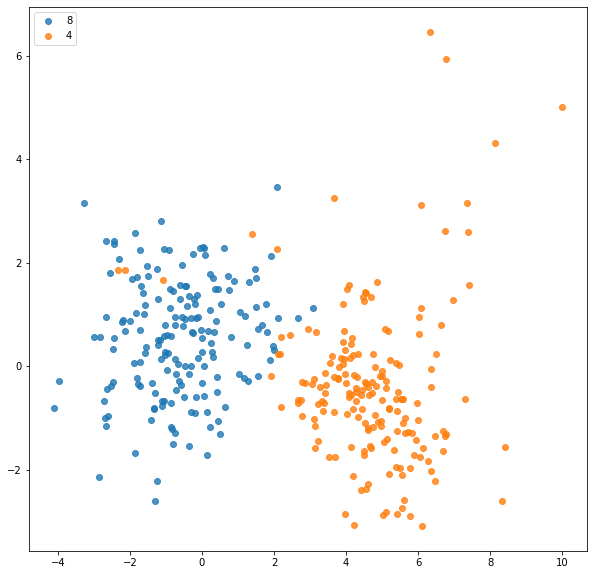

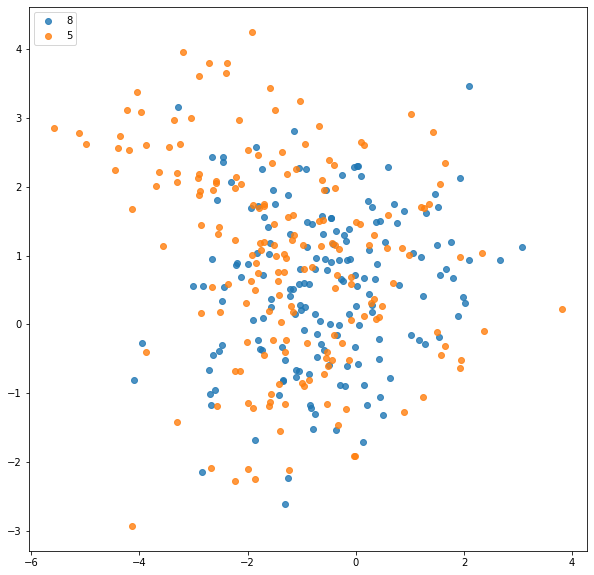

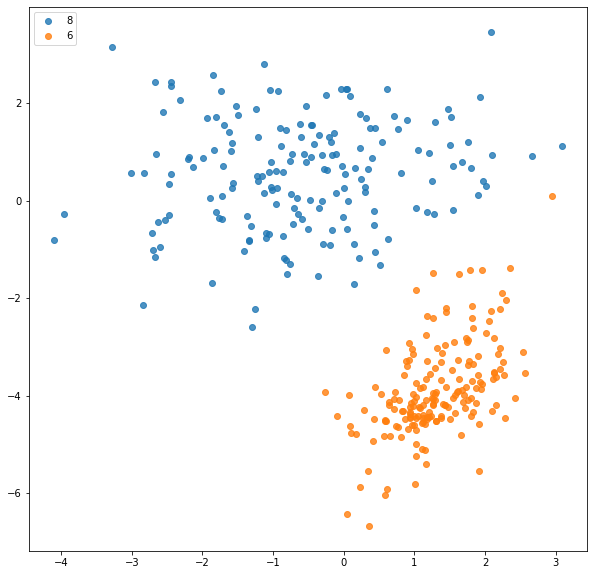

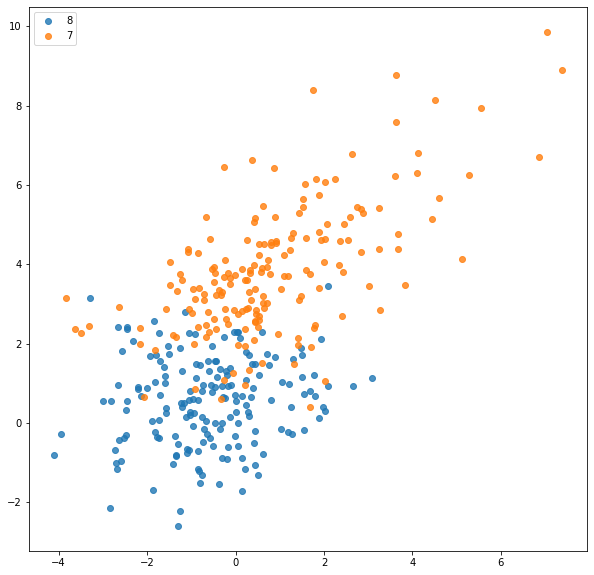

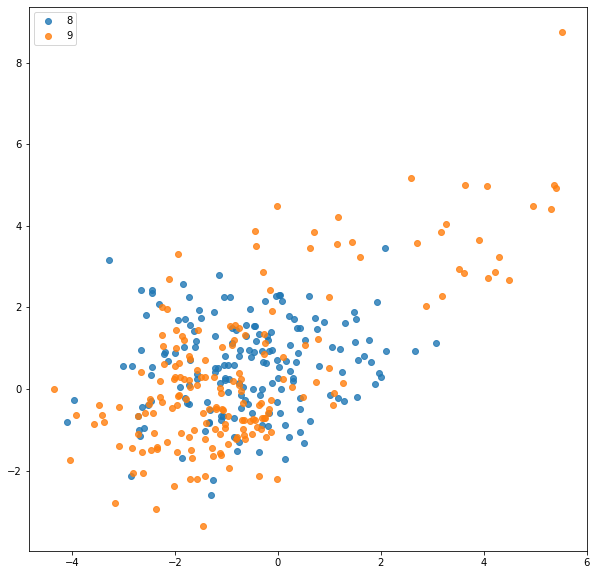

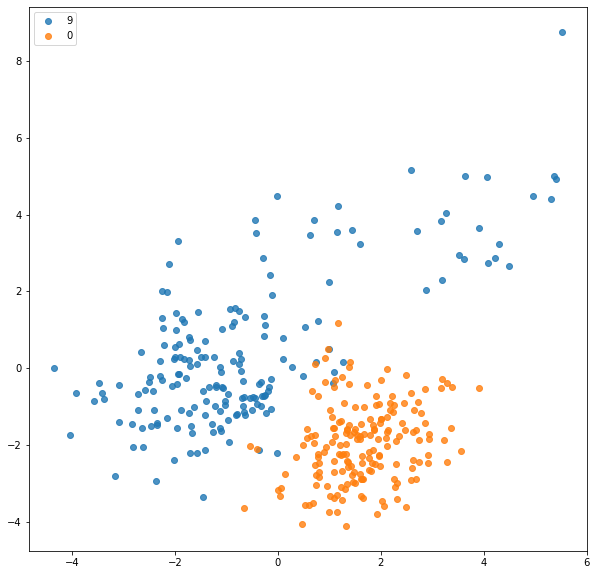

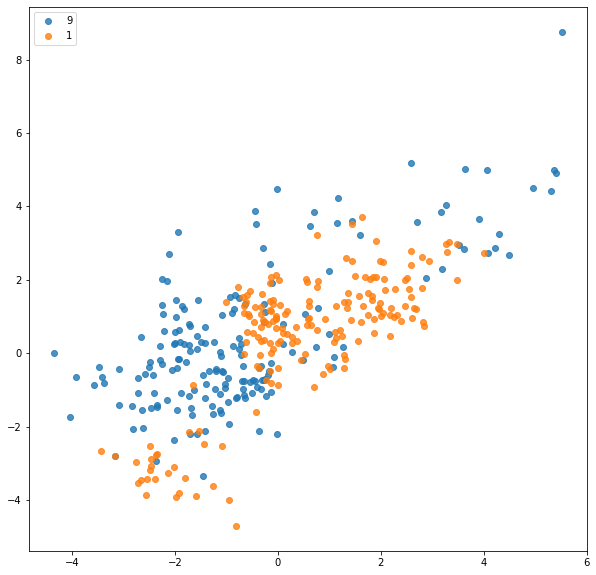

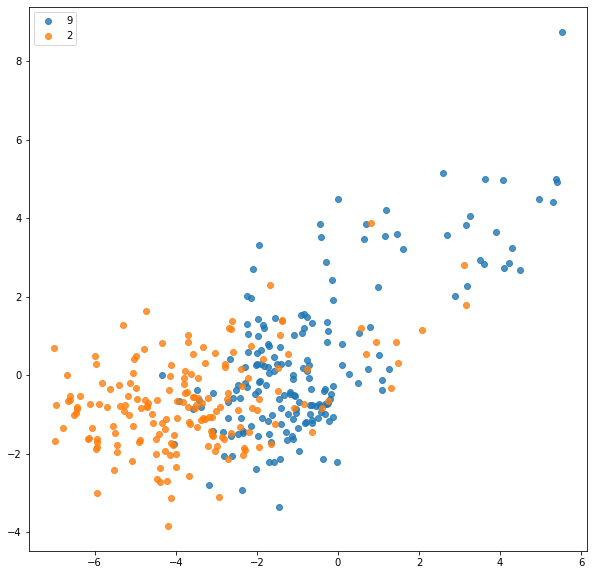

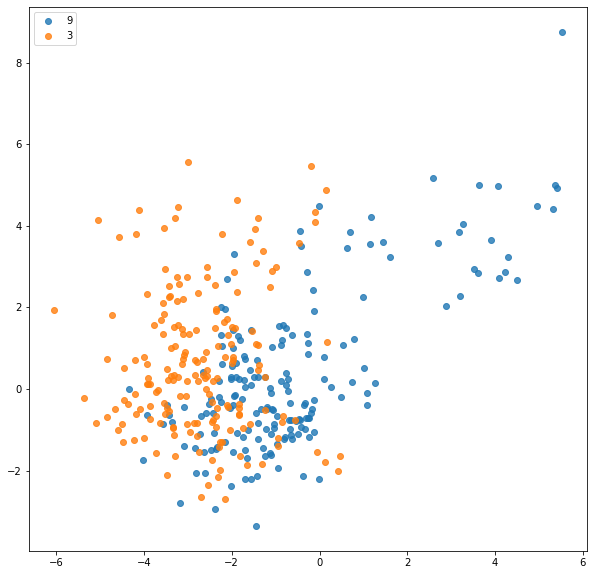

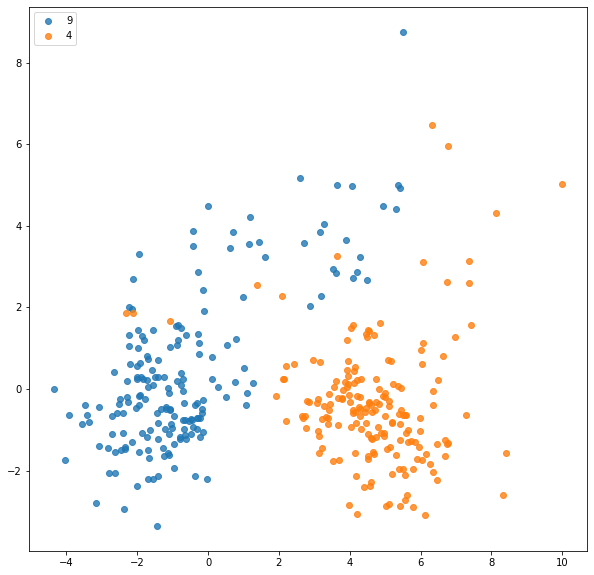

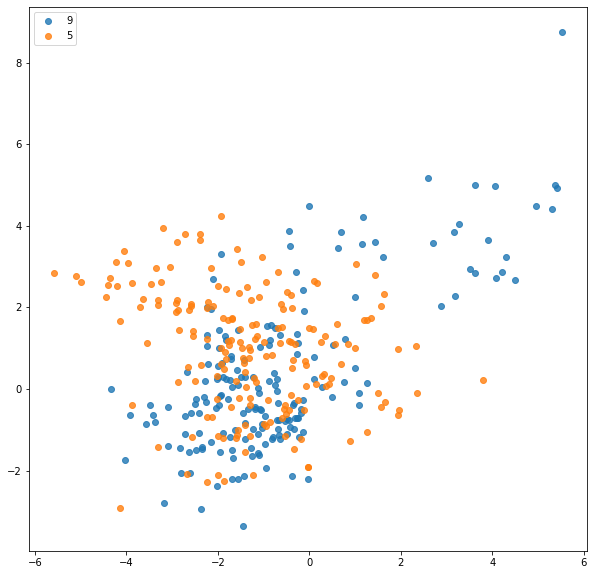

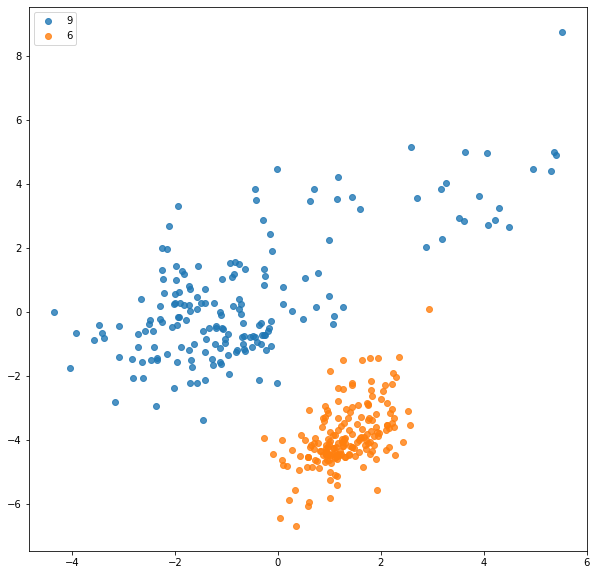

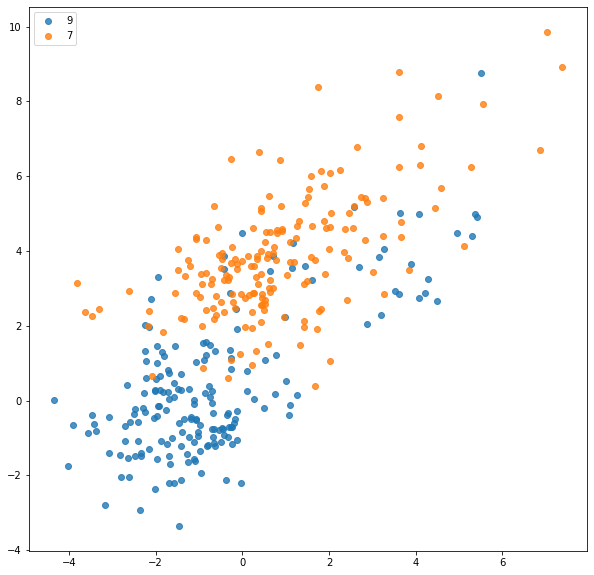

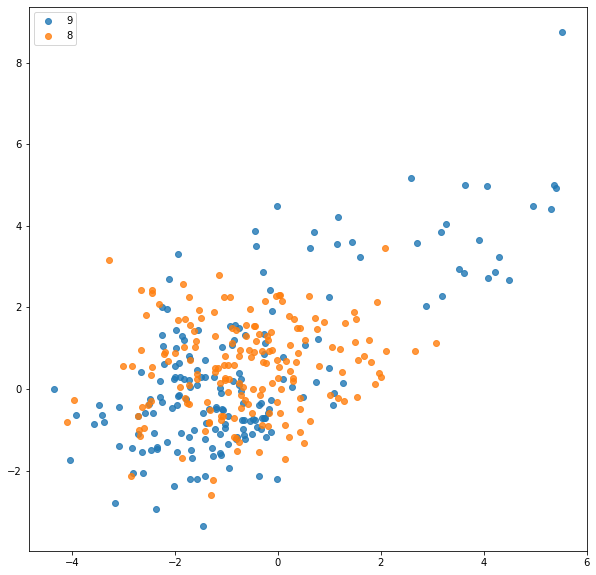

In [90]:
## code here


for a in range(0,10):
    for b in range(0,10): 
        if a !=b:
            fig = plt.figure(figsize=(10,10))
            plt.plot(np.array(dataP[data.iloc[:,0]==a,0]), np.array(dataP[data.iloc[:,0]==a,1]),
            'o', alpha=0.8, label=d)
            plt.plot(np.array(dataP[data.iloc[:,0]==b,0]), np.array(dataP[data.iloc[:,0]==b,1]),
            'o', alpha=0.8, label=d)
            plt.legend([a,b],loc='upper left');

- Three examples of number pairs that are clearly distinguishable from first 2 PCs:
1. 0,2
2. 0,3
3. 1,6

- Three examples of number pairs that are not distinguishable from first 2 PCs:

1. 1,7
2. 2,3
3. 3,5

## 2. PCA for feature engineering

Another common application of PCA is overcomming multicollinearity and overfitting in regression models. Here we'll use PCA for reducing dimensionality of a data set and improving the accuracy in the regression task.

In [91]:
#read data
data=pd.read_csv("https://raw.githubusercontent.com/CUSP2022ADS/Data/main/pca_synthetic.csv")
data.head()

,Y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,3.035437,-18.227424,30.521149,-37.494755,31.108940,-8.917930,13.177162,10.153335,17.521327,14.695400,7.222120,3.142381,13.754352,0.115685,6.263643,8.957240
1,1.479243,31.210052,8.273238,17.545475,8.013616,-3.163515,12.632948,10.384905,7.278064,11.506060,21.150410,14.558149,15.393978,13.701066,14.993476,17.993337
2,-1.193325,-2.427634,1.698858,-1.980364,-9.902694,9.215057,9.984092,7.627307,7.701929,15.254064,15.665984,6.676761,14.504275,19.329674,11.312780,13.360359
3,0.634462,-10.778091,-4.718246,-4.861350,13.543559,-10.575067,25.562832,2.064966,12.297941,7.063591,14.787318,4.751835,16.473578,15.697654,3.765299,8.776716
4,-0.125792,5.547746,-10.935812,-1.397010,1.977636,-17.475947,13.159905,18.881544,4.986746,12.079755,13.762270,5.192296,11.656484,13.370774,16.536450,7.264736


### Task 1: Run a linear regression with 'Y' as the target and x1-x15 as regressors and report out of sample R2 score

Split the data into training and test (choose 70:30 split) and report out of sample score with test data. Also comment on the significance of the regressors (based on p-values)

In [92]:
## code here

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X=data.iloc[:,1:]
Y=data.iloc[:,0]

np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(X),Y,test_size=0.3) #split data into training (70%) and test (30%)

lm=sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     5.189
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           0.000533
Time:                        10:40:59   Log-Likelihood:                -39.065
No. Observations:                  35   AIC:                             110.1
Df Residuals:                      19   BIC:                             135.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.6969      3.386     -3.750      0.0

In [93]:
## report mean out-of-sample R2 score

y_pred=lm.predict(X_test)

print("OS R-squared is:",round(r2_score(y_test,y_pred)*100,2),'%')

OS R-squared is: 75.28 %


### Task 2: Try PCA - use a few leading principal components as regressors and see if they will perform better in the regression

You can choose the number of PCs by either checking explained variance or by trying out different numbers and choosing one that works best.

Split the data into training and test and report mean test accuracy

In [94]:
## run PCA
## code here


scaler = preprocessing.StandardScaler().fit(X)
pca = PCA(X.shape[1])
dataP=pca.fit_transform(scaler.transform(X))

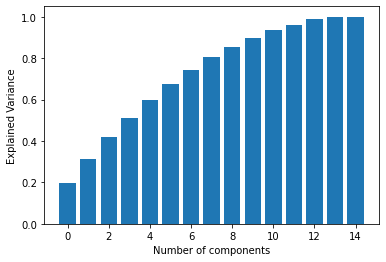

In [95]:
## plot explained variance barplot and comment on the appropriate number of eigenvectors based on that

eigenvalues = pca.explained_variance_ratio_
eigenvalues
#plot explained variance over the number of compinents
n=15 
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

In [96]:
## choose leading number of PCs as regressors and run linear regression again

np.random.seed(0)


X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3) #randomly split data into training (70%) and test (30%)

#now apply PCA to the training data
scaler = preprocessing.StandardScaler().fit(X_train)
pca = PCA(8) #take 8 leading principal components to get enough data but avoid overfitting

P_train=pca.fit_transform(scaler.transform(X_train)) #get principal components for the scaled training sample
res=sm.OLS(y_train,sm.add_constant(P_train)).fit() #fit the regression over 


P_test=pca.transform(scaler.transform(X_test))
y_pred=np.asarray(res.predict(sm.add_constant(P_test)))

# print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is",round(r2_score(y_test,y_pred)*100,2),'%')

OS R-squared is 63.19 %


In [97]:
## report out of sample mean R2 score

print("OS R-squared is",round(r2_score(y_test,y_pred)*100,2),'%')

OS R-squared is 63.19 %


## 3: Modeling mean income with 311 complaint patterns

We'll use 311 complaints data set to model the mean income of zip codes in NYC. We will aslo check if using PCA in this case improves the performance as compared to just the linear model.

In [98]:
#load the income data
dataIncome=pd.read_csv("https://raw.githubusercontent.com/CUSP2022ADS/Data/main/MeanZIP.csv",index_col=0)
dataIncome=dataIncome.apply(pd.to_numeric, errors='coerce')
dataIncome=dataIncome.loc[dataIncome.Mean>0]
dataIncome.shape

(32627, 3)

In [99]:
## 311 data
data311 = pd.read_csv('https://raw.githubusercontent.com/CUSP2022ADS/Data/main/aggr311.csv' , index_col=0 )
data311.Zip=pd.to_numeric(data311.Zip,errors='coerce')
data311=data311.loc[(data311.Zip>=10000)&(data311.Zip<11500)] #take only NYC zip codes
data311=pd.pivot_table(data311,index='Zip',columns='Complain',values='Count',fill_value=0)
Total311=data311.sum(axis=1) #total 311 activity per zip code
data311=data311.div(data311.sum(axis=1), axis=0) #normalize activity of various cathegories within zip code by total
data311=data311.loc[Total311>100] #keep only those zip codes having sufficient activity
data311.shape

(179, 162)

In [100]:
#merge income data with 311

# doing an inner join to remove zips which don't have income data 
income_311 = data311.merge(dataIncome, left_on=data311.index, right_on=dataIncome.index,how = 'inner').set_index('key_0')
income_311.shape

(175, 165)

### Task 1: Using 'Mean' as target variable, and 311 complaints as regressors, run a linear regression model and report out of sample (test) accuracy after cross validation

In [101]:
X=income_311.iloc[:,:-3]
Y=income_311.Mean

In [102]:
## code here
np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
np.random.seed(2018)
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(X),Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    res=sm.OLS(y_train,X_train).fit()
    R_IS.append(res.rsquared)   
    y_pred=res.predict(X_test)
    R_OS.append(r2_score(y_test,y_pred))
    
    #R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)*2).sum()/((y_test-np.mean(y_test))*2).sum())
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 1.000+-0.000
OS R-squared is -6.554+-12.021


### Task 2: Now analyze performance using PCA depending on the number N of leading PCs to take.

In [103]:
# apply PCA first for whole data

scaler = preprocessing.StandardScaler().fit(X)
pca = PCA(X.shape[1])
dataP=pca.fit_transform(scaler.transform(X))

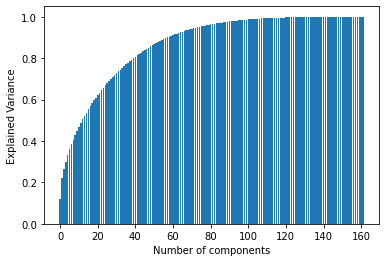

In [104]:
## plot explained variance and chose N leading PCs (choose N either by explained variance or try different values and choose best one)

eigenvalues = pca.explained_variance_ratio_
eigenvalues
#plot explained variance over the number of compinents
n=X.shape[1]
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

In [105]:
## train a linear model based on above N PCs and report out of sample accuracy (with cross-validation)

np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs

for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(X),Y,test_size=0.3)
     #randomly split data into training (70%) and test (30%)
    #now apply PCA to the training data
    scaler = preprocessing.StandardScaler().fit(X_train) #introduce a scaler first as it is important to scale data before PCA!
    pca = PCA(40) #take 40 leading principal components
    P_train=pca.fit_transform(scaler.transform(X_train)) #get principal components for the scaled training sample
    res=sm.OLS(y_train,sm.add_constant(P_train)).fit() #fit the regression over 
    P_test=pca.transform(scaler.transform(X_test))
    y_pred=np.asarray(res.predict(sm.add_constant(P_test)))
    
    R_IS.append(res.rsquared)
    R_OS.append(r2_score(y_test,y_pred))
## report out of sample mean R2 score
print("IS R-squared is %.3f"%(np.mean(R_IS)))
print("OS R-squared is %.3f"%(np.mean(R_OS)))

IS R-squared is 0.919
OS R-squared is 0.296


### Task 3: Try implementing Lasso regression (feature selection) over all the PCs.

Use alpha=10000 as the regularization parameter. Report out of sample mean R2 score by splitting data into train and test

In [106]:
np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=1000 #number of runs

for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(X),Y,test_size=0.3)
     #randomly split data into training (70%) and test (30%)
    #now apply PCA to the training data
    scaler = preprocessing.StandardScaler().fit(X_train) #introduce a scaler first as it is important to scale data before PCA!
    
    # IMPORTANT NOTE FOR GRADER: Because taking all PCs is causing an issue (training data is less than no. of columns, 
#     I have taken number of PCs to be same as length of training data after discussion with TA)
    
    pca = PCA(X_train.shape[0]) 
    P_train=pca.fit_transform(scaler.transform(X_train)) #get principal components for the scaled training sample
    
    model = Lasso(alpha=10000)
    
    res= model.fit(sm.add_constant(P_train), y_train) #fit the regression over 
    P_test=pca.transform(scaler.transform(X_test))
    y_pred=np.asarray(res.predict(sm.add_constant(P_test)))
  
    R_OS.append(r2_score(y_test,y_pred))
    R_IS.append(r2_score(y_train,np.asarray(res.predict(sm.add_constant(P_train)))))
    
# report out of sample mean R2 score
print("Mean IS R-squared with lasso is %.3f"%(np.mean(R_IS)))
print("Mean OS R-squared with lasso is %.3f"%(np.mean(R_OS)))

Mean IS R-squared with lasso is 0.697
Mean OS R-squared with lasso is 0.544


### Task 4: Implement cross-validation for Lasso PCA regression above with further splitting the training sample into training and validation and tuning the parameter over the validation sample

In [107]:
## code here

np.random.seed(0)
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)    

sc = preprocessing.StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

pca = PCA(X_train.shape[0]).fit(X_train)
X_train = pca.transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)

for i in range(1000,11000,1000):
    model = Lasso(alpha=i)
    model.fit(X_train, y_train)
    yval = model.predict(X_val)
    R_OS = r2_score(y_val,yval)

    print("alpha is:",i,"Validation R-squared is:",R_OS*100)

model = Lasso(alpha=10000)
model.fit(X_train, y_train)
R_OS = r2_score(y_test,model.predict(X_test))

# R_OS = 1-((model.predict(X_test)-y_test)**2).mean()/y_test.var()
print("\nOS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))


alpha is: 1000 Validation R-squared is: -388.85187311382515
alpha is: 2000 Validation R-squared is: -250.48370692978116
alpha is: 3000 Validation R-squared is: -225.68132390029834
alpha is: 4000 Validation R-squared is: -179.6906413420289
alpha is: 5000 Validation R-squared is: -139.21914295595928
alpha is: 6000 Validation R-squared is: -97.29575693607633
alpha is: 7000 Validation R-squared is: -62.06484515026105
alpha is: 8000 Validation R-squared is: -37.93638619827953
alpha is: 9000 Validation R-squared is: -23.560287027048265
alpha is: 10000 Validation R-squared is: -12.43580649745395

OS R-squared is 0.627+-0.000


In [108]:
# ALTERNATE SOLUTION WITH GRID SEARCH CV FOR CROSS VALIDATION (DONE BECAUSE QUESTION ISN'T CLEAR ON OBJECTIVES)

from sklearn.model_selection import GridSearchCV
param_grid = {'alpha':range(1,10000,100)}
model = Lasso()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
sc = preprocessing.StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# IMPORTANT NOTE FOR GRADER: Because taking all PCs is causing an issue (training data is less than no. of columns, 
# I have taken number of PCs to be same as length of training data after discussion with TA)

pca = PCA(X_train.shape[0]).fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

gr=GridSearchCV(model,param_grid=param_grid)
rs=gr.fit(X_train,y_train)

print("Best alpha parameter:",rs.best_params_)

R_OS = 1-((rs.predict(X_test)-y_test)**2).mean()/y_test.var()
print("OS R-squared is:", R_OS*100)


Best alpha parameter: {'alpha': 9901}
OS R-squared is: 58.20302211084811
